<a href="https://colab.research.google.com/github/Charith-25/RL-Project/blob/main/Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Functions

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
def get_reward(maze,end): #reward function
  rows, cols = maze.shape
  rewards = np.zeros_like(maze, dtype=float)
  rewards[maze == 0] = -1 # -1 for walls
  rewards[end[1], end[0]] = 1 # 1 for goal
  return rewards,rows,cols

In [ ]:
def choose_action(state, epsilon): #choosing action
    if random.random() < epsilon:
        return random.randint(0, 3) # exploration
    else:
        return np.argmax(Q[state[0], state[1]]) #highest Q value in exploitation

In [ ]:
def Q_learning(num_episodes,rows,cols,rewards,learning_rate,discount_factor,start,Q,end): #training agent
  for episode in range(num_episodes):
    state = (start[1], start[0])
    done = False

    while not done:
        action = choose_action(state, epsilon=max(0.1, 1 - episode / num_episodes))  # Decreasing epsilon
        next_state = state #update state
        if action == 0:  # Up
            next_state = (max(0, state[0] - 1), state[1])
        elif action == 1:  # Down
            next_state = (min(rows-1, state[0] + 1), state[1])
        elif action == 2:  # Left
            next_state = (state[0], max(0, state[1] - 1))
        elif action == 3:  # Right
            next_state = (state[0], min(cols-1, state[1] + 1))

        # Calculate immediate reward
        immediate_reward = rewards[next_state[0], next_state[1]]

        # Update Q-value using the Bellman equation
        Q[state[0], state[1], action] += learning_rate * (immediate_reward + discount_factor * np.max(Q[next_state[0], next_state[1]]) - Q[state[0], state[1], action])

        state = next_state

        # Check if the goal is reached
        if state == (end[1], end[0]):
            done = True
  return Q

In [ ]:
def path(maze1,rows,cols,start,end,Q): #visualize path
  optimal_path = []
  state = (start[1], start[0])
  while state != (end[1], end[0]):
      action = np.argmax(Q[state[0], state[1]]) #highest Q valued action
      optimal_path.append(action)
      maze1[state[0], state[1]] = 4 #visited path
      if action == 0:  # Up
          state = (max(0, state[0] - 1), state[1])
      elif action == 1:  # Down
          state = (min(rows-1, state[0] + 1), state[1])
      elif action == 2:  # Left
          state = (state[0], max(0, state[1] - 1))
      elif action == 3:  # Right
          state = (state[0], min(cols-1, state[1] + 1))
  return maze1,optimal_path

In [ ]:
def show_maze_out(matrix,start_point,end_point): #maze display
  binary_image = np.where(matrix == 1, 1.0, np.where(matrix == 4, 0.5, 0.0))
  fig, ax = plt.subplots()

  ax.imshow(binary_image, cmap='gray', interpolation='nearest')

  for x in range(binary_image.shape[1]):
      for y in range(binary_image.shape[0]):
          if binary_image[y, x] == 1:
              rect = patches.Rectangle((x-0.5, y-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='none')
              ax.add_patch(rect)

          elif binary_image[y, x] == 4:
              path = patches.Rectanglepatches.Rectangle((x-0.5, y-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='green')
              ax.add_patch(path)

  start_rect = patches.Rectangle((start_point[0]-0.5, start_point[1]-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='orange') #start
  end_rect = patches.Rectangle((end_point[0]-0.5, end_point[1]-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='red') #end

  ax.add_patch(start_rect)
  ax.add_patch(end_rect)

  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_xticklabels([])
  ax.set_yticklabels([])
  plt.show()

### Agent to 1 Target

In [ ]:
#maze env
maze = np.array([
    [ 1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.],
    [ 0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
    [ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.],
    [ 1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.],
    [ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.],
    [ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
    [ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.],
    [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.],
    [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
])
maze1 = maze.copy()

In [ ]:
start = (6,8) #start (x,y)
end = (0,0)  #end (x,y)
learning_rate = 0.8
discount_factor = 0.9
num_episodes = 1000

In [ ]:
rewards,rows,cols = get_reward(maze,end)

In [ ]:
# Q table
Q = np.zeros((rows, cols, 4))

In [ ]:
Q1 = Q_learning(num_episodes,rows,cols,rewards,learning_rate,discount_factor,start,Q,end)

In [ ]:
maze2,opti = path(maze1,rows,cols,start,end,Q1)

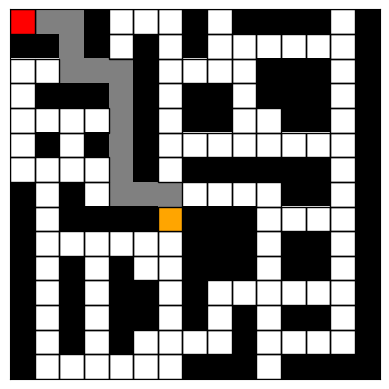

In [ ]:
show_maze_out(maze2,start,end)

In [ ]:
def show_maze_out3(matrix,start_point,end_point,opt): #maze display
  binary_image = np.where(maze == 1, 1.0, np.where(maze == 4, 0.5, 0.0))
  fig, ax = plt.subplots()

  ax.imshow(binary_image, cmap='gray', interpolation='nearest')
  i = start_point[0]
  j = start_point[1]
  for x in opt:
    if x == 0:
      rect = patches.Rectangle((i-0.5, j-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='gray')
      ax.add_patch(rect)
      j = j - 1

    if x == 1:
      rect = patches.Rectangle((i-0.5, j-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='gray')
      ax.add_patch(rect)
      j = j + 1

    if x == 2:
      rect = patches.Rectangle((i-0.5, j-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='gray')
      ax.add_patch(rect)
      i = i - 1

    if x == 3:
      rect = patches.Rectangle((i-0.5, j-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='gray')
      ax.add_patch(rect)
      i = i+1

      '''for y in range(binary_image.shape[0]):
          if binary_image[y, x] == 1:
              rect = patches.Rectangle((x-0.5, y-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='none')
              ax.add_patch(rect)

          elif binary_image[y, x] == 4:
              path = patches.Rectanglepatches.Rectangle((x-0.5, y-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='green')
              ax.add_patch(path)
'''
  start_rect = patches.Rectangle((start_point[0]-0.5, start_point[1]-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='orange') #start
  end_rect = patches.Rectangle((end_point[0]-0.5, end_point[1]-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='red') #end

  ax.add_patch(start_rect)
  ax.add_patch(end_rect)

  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_xticklabels([])
  ax.set_yticklabels([])
  plt.show()

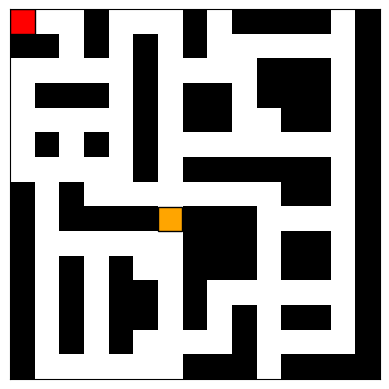

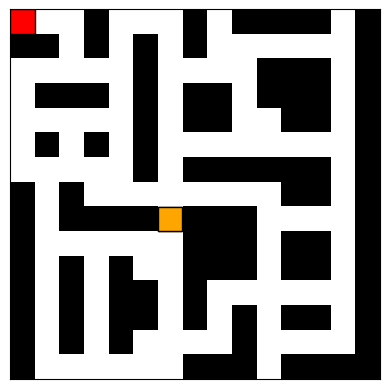

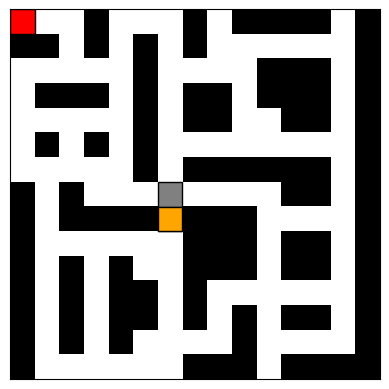

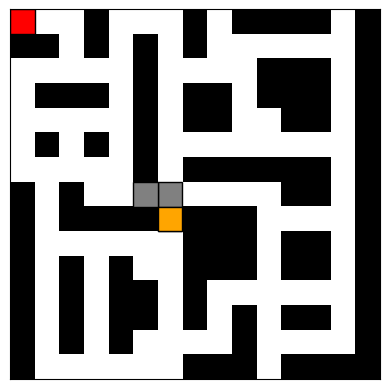

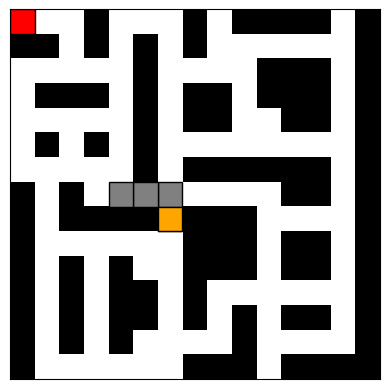

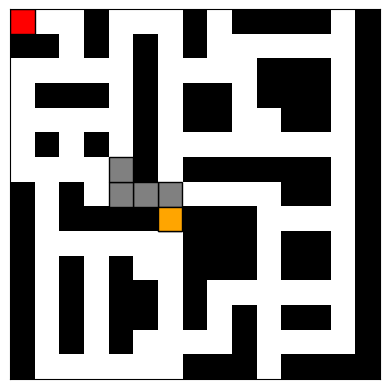

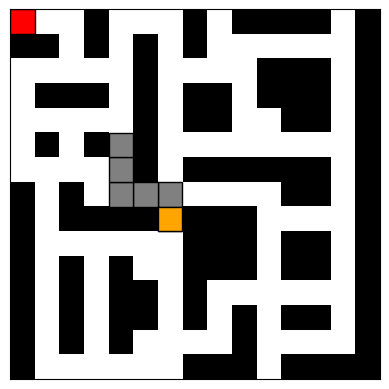

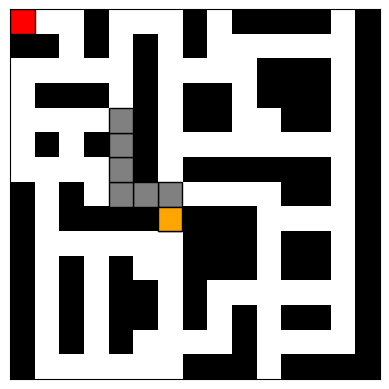

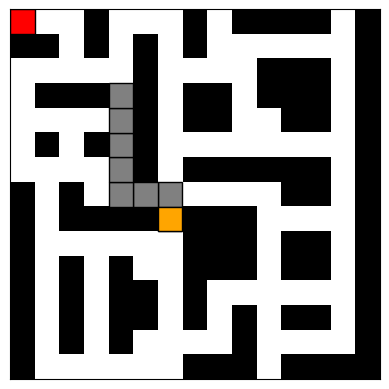

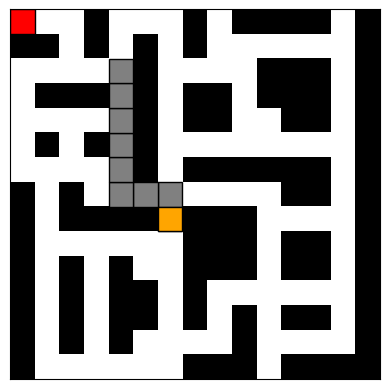

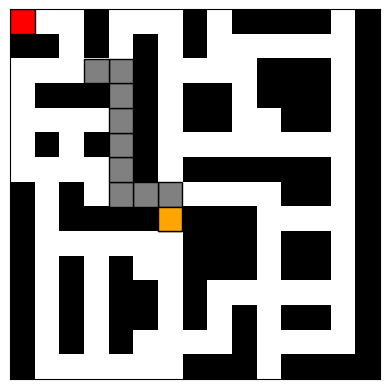

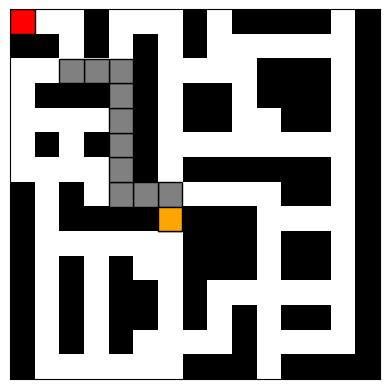

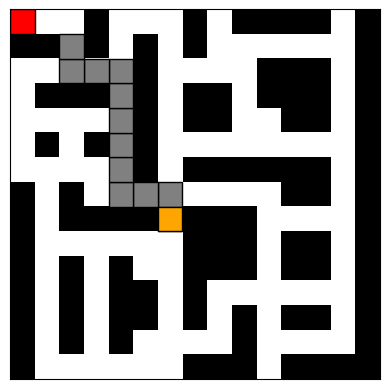

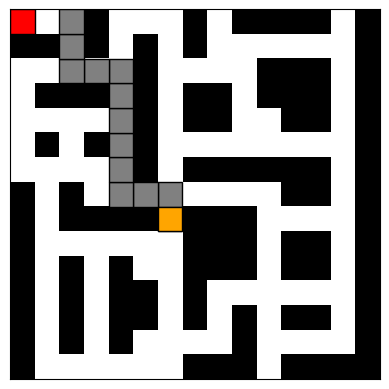

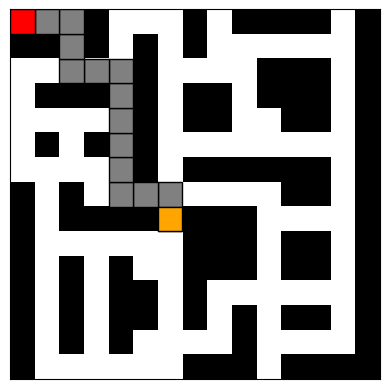

In [ ]:
for i in range(len(opti)+1):
    result_list = opti[:i]
    show_maze_out3(maze2,start,end,result_list)

<Figure size 800x600 with 0 Axes>

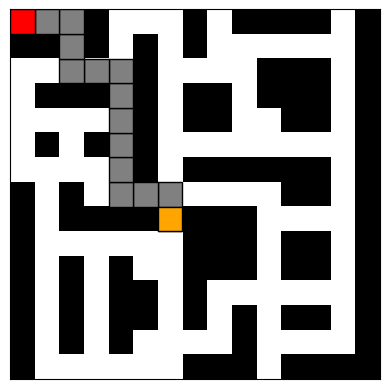

<Figure size 800x600 with 0 Axes>

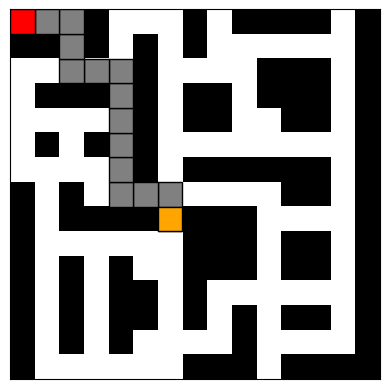

<Figure size 800x600 with 0 Axes>

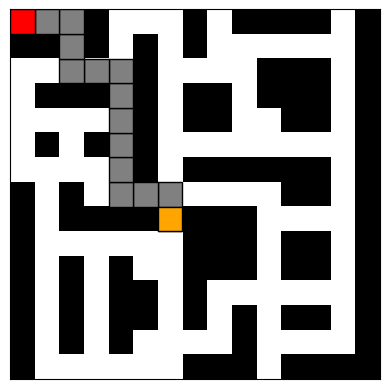

<Figure size 800x600 with 0 Axes>

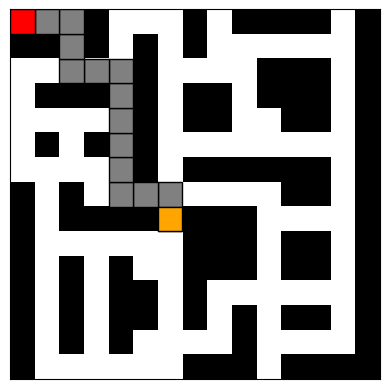

<Figure size 800x600 with 0 Axes>

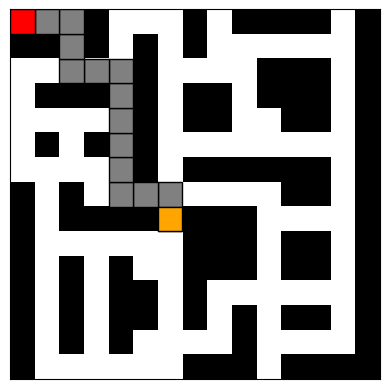

<Figure size 800x600 with 0 Axes>

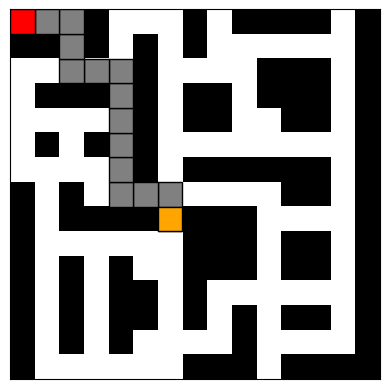

<Figure size 800x600 with 0 Axes>

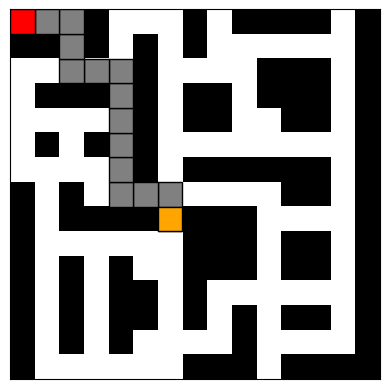

<Figure size 800x600 with 0 Axes>

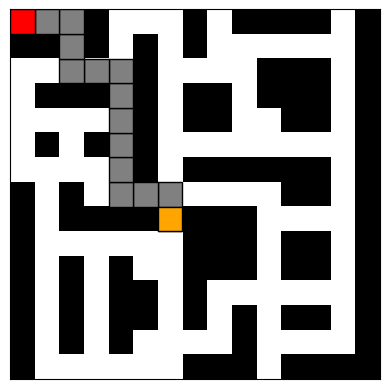

<Figure size 800x600 with 0 Axes>

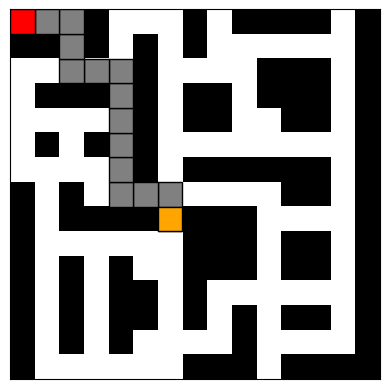

<Figure size 800x600 with 0 Axes>

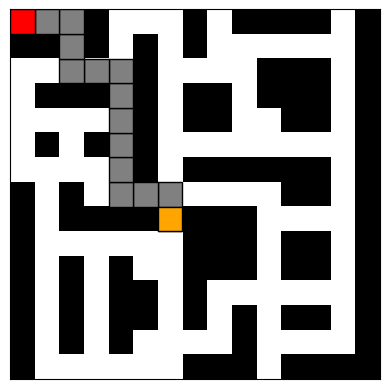

<Figure size 800x600 with 0 Axes>

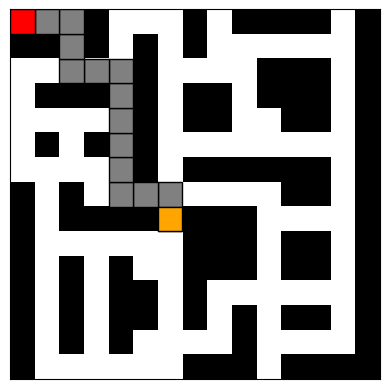

<Figure size 800x600 with 0 Axes>

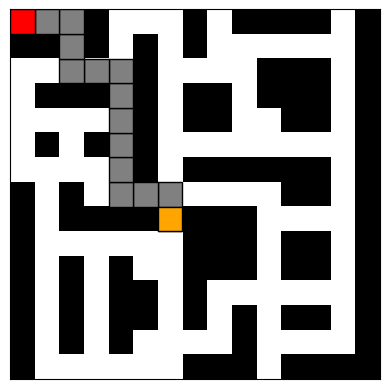

<Figure size 800x600 with 0 Axes>

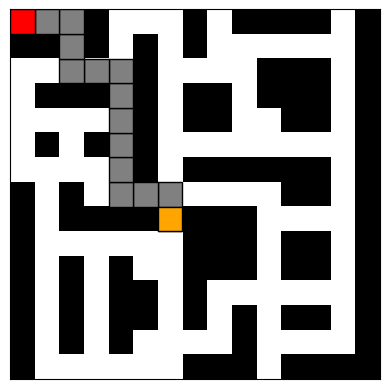

<Figure size 800x600 with 0 Axes>

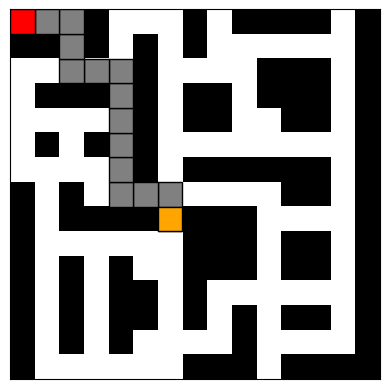

<Figure size 800x600 with 0 Axes>

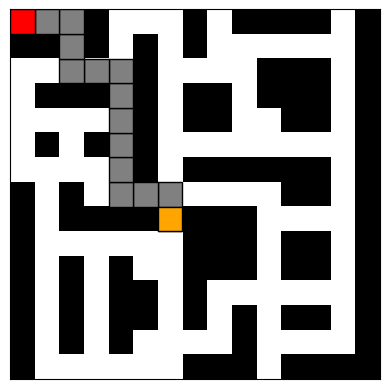

<Figure size 800x600 with 0 Axes>

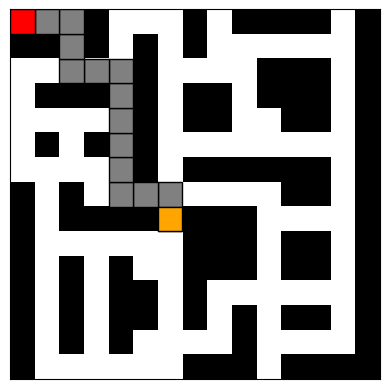

<Figure size 800x600 with 0 Axes>

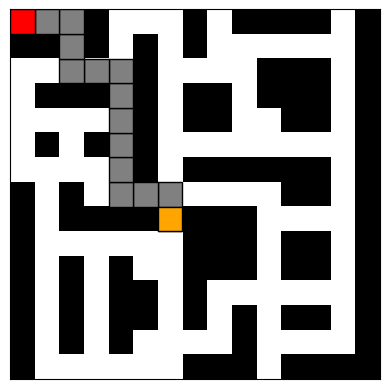

<Figure size 800x600 with 0 Axes>

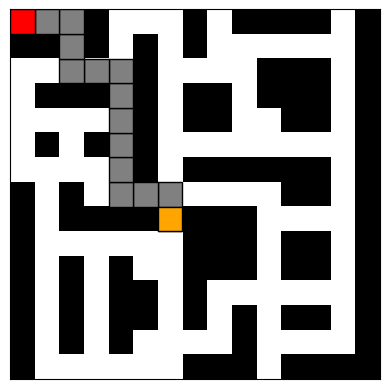

<Figure size 800x600 with 0 Axes>

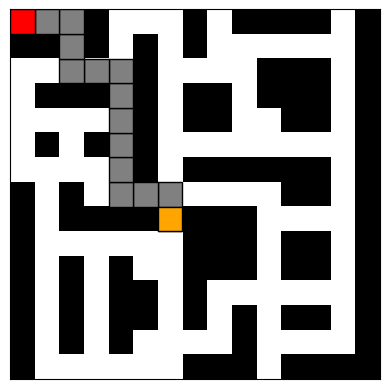

<Figure size 800x600 with 0 Axes>

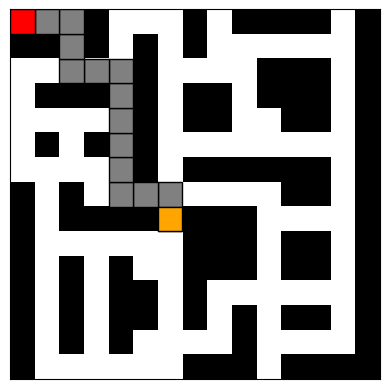

<Figure size 800x600 with 0 Axes>

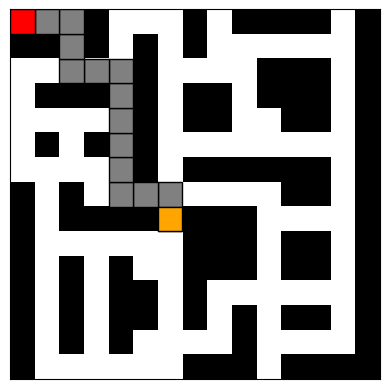

<Figure size 800x600 with 0 Axes>

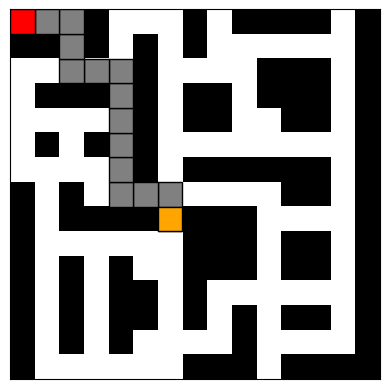

<Figure size 800x600 with 0 Axes>

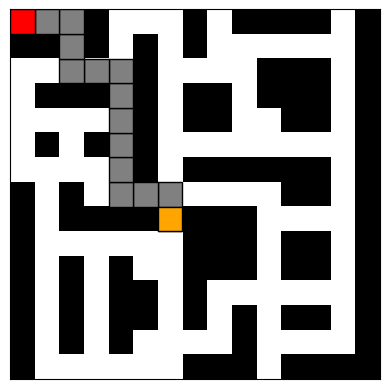

<Figure size 800x600 with 0 Axes>

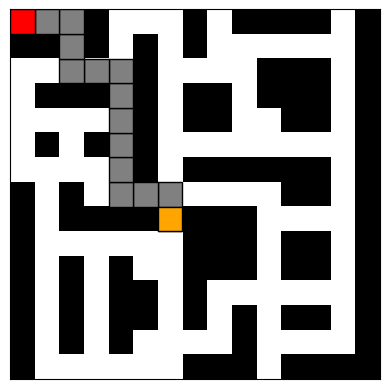

<Figure size 800x600 with 0 Axes>

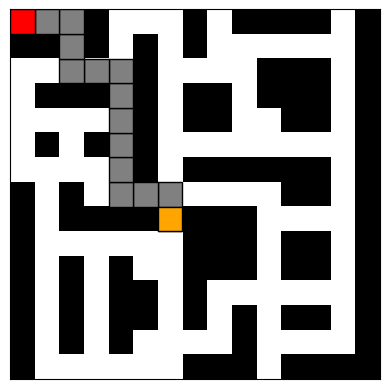

<Figure size 800x600 with 0 Axes>

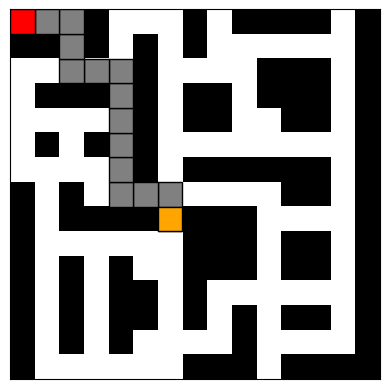

<Figure size 800x600 with 0 Axes>

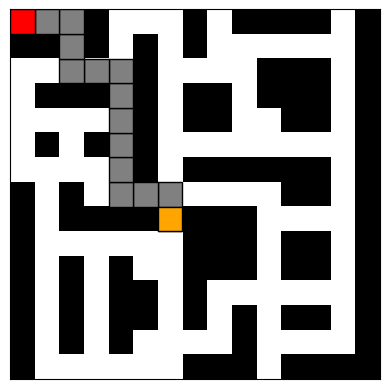

<Figure size 800x600 with 0 Axes>

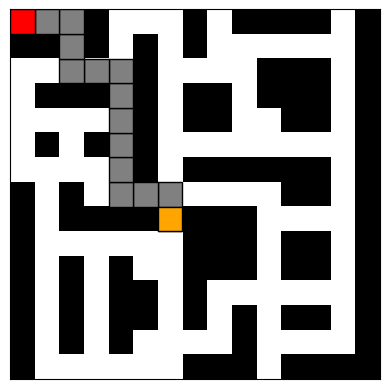

<Figure size 800x600 with 0 Axes>

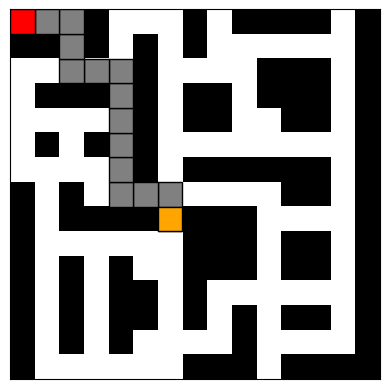

<Figure size 800x600 with 0 Axes>

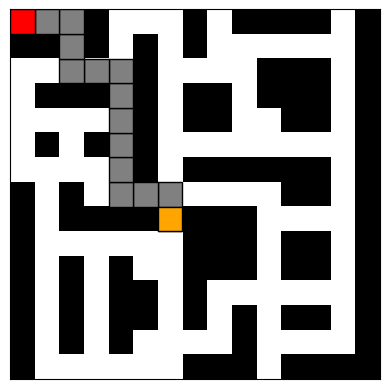

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to create a plot
def create_plot(frame_number):
   show_maze_out3(maze2,start,end,result_list)

# Set the number of frames and video parameters
num_frames = 30
video_filename = 'output_video.mp4'
fps = 5  # frames per second

# Create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(video_filename, fourcc, fps, (800, 600))

# Generate and save frames to the video
for frame_number in range(num_frames):
    plt.figure(figsize=(8, 6))
    create_plot(frame_number)

    # Save the plot as an image
    plt.savefig('temp_frame.png')
    plt.close()

    # Read the saved image using OpenCV
    frame = cv2.imread('temp_frame.png')

    # Resize the frame to fit the video dimensions
    frame = cv2.resize(frame, (800, 600))

    # Write the frame to the video file
    video_writer.write(frame)

# Release the VideoWriter object
video_writer.release()

# Clean up temporary files
import os
os.remove('temp_frame.png')


### 1 Agent going through multiple targets

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
def show_maze_out(matrix,points):
  binary_image = np.where(matrix == 1, 1.0, np.where(matrix == 4, 0.5, 0.0))
  fig, ax = plt.subplots()

  ax.imshow(binary_image, cmap='gray', interpolation='nearest')

  for x in range(binary_image.shape[1]):
      for y in range(binary_image.shape[0]):
          if binary_image[y, x] == 1:
              rect = patches.Rectangle((x-0.5, y-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='none')
              ax.add_patch(rect)

          elif binary_image[y, x] == 4:
              path = patches.Rectanglepatches.Rectangle((x-0.5, y-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='green')
              ax.add_patch(path)


  #end_rect = patches.Rectangle((end_point[0]-0.5, end_point[1]-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='red')

  for i in range(len(points)-1):
    junc = patches.Rectangle((points[i+1][0]-0.5, points[i+1][1]-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='red')
    ax.add_patch(junc)

  start_rect = patches.Rectangle((points[0][0]-0.5, points[0][1]-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='orange') #coordinates
  ax.add_patch(start_rect)


  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_xticklabels([])
  ax.set_yticklabels([])
  plt.show()

In [ ]:
def path(maze1,rows,cols,start,end,Q):
  optimal_path = []
  state = (start[1], start[0])
  while state != (end[1], end[0]):
      action = np.argmax(Q[state[0], state[1]])
      optimal_path.append(action)
      maze1[state[0], state[1]] = 4
      if action == 0:  # Up
          state = (max(0, state[0] - 1), state[1])
      elif action == 1:  # Down
          state = (min(rows-1, state[0] + 1), state[1])
      elif action == 2:  # Left
          state = (state[0], max(0, state[1] - 1))
      elif action == 3:  # Right
          state = (state[0], min(cols-1, state[1] + 1))
  return maze1,optimal_path

In [ ]:
maze = np.array([
    [ 1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.],
    [ 0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
    [ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.],
    [ 1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.],
    [ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.],
    [ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
    [ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.],
    [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.],
    [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
])
maze_copy = maze.copy()
maze1 = maze.copy()

In [ ]:
start = (6,1) #start (x,y)
end = (6,1)   #end (x,y)
learning_rate = 0.8
discount_factor = 0.9
num_episodes = 1000

In [ ]:
rewards,rows,cols = get_reward(maze,end)

In [ ]:
Q = np.zeros((rows, cols, 4))

In [ ]:
def train(maze,start,end):
  rewards,rows,cols = get_reward(maze,end)
  Q1 = Q_learning(num_episodes,rows,cols,rewards,learning_rate,discount_factor,start,Q,end)
  maze2,optimal_path = path(maze1,rows,cols,start,end,Q1)
  return maze2,optimal_path

In [ ]:
# route with target points
points = [(6,1),(13,3),(3,12),(6,1)]

In [ ]:
opt = [] #store optimal paths
for i in range(len(points)-1):
  maze1,optimal_path = train(maze1,points[i],points[i+1]) #t train between points
  opt.append(optimal_path)

In [ ]:
op = [] #all paths combined
for nums in opt:
  for val in nums:
    op.append(val)

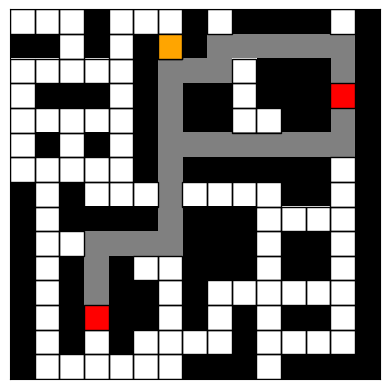

In [ ]:
show_maze_out(maze1,points)

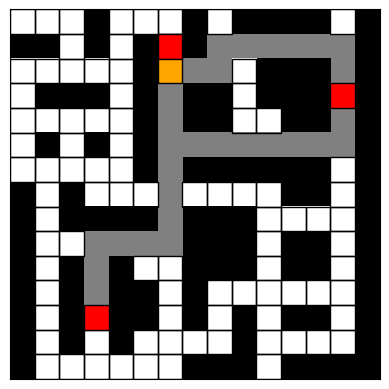

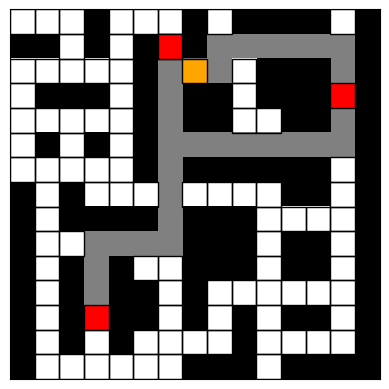

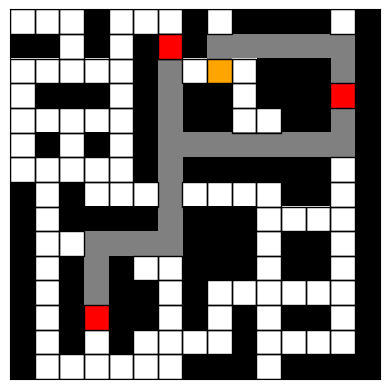

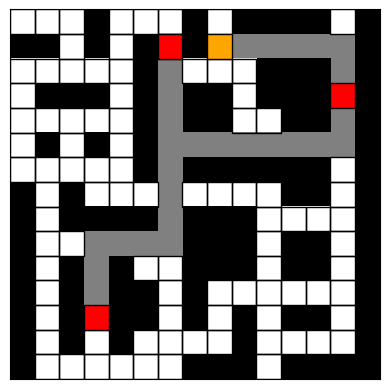

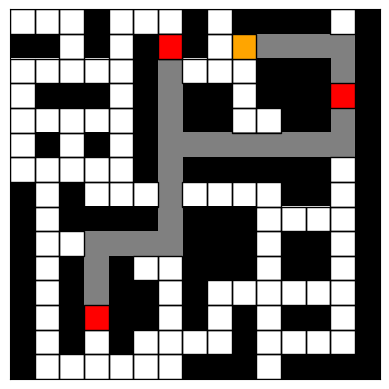

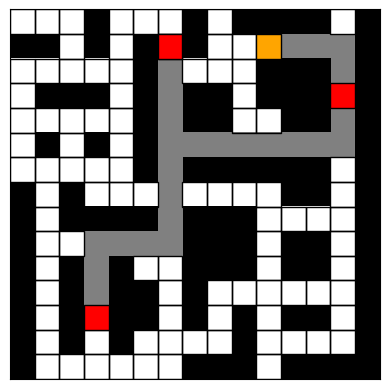

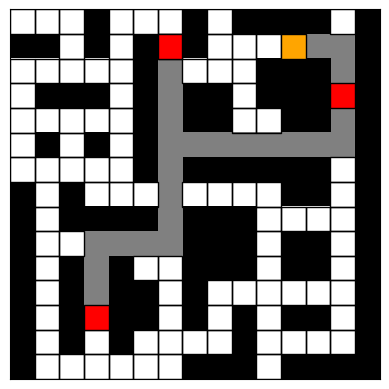

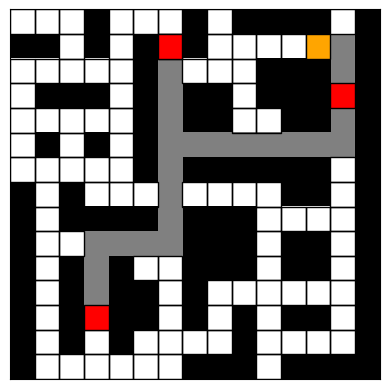

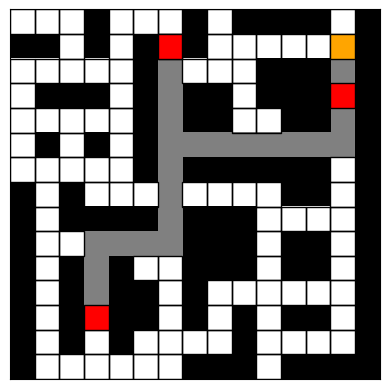

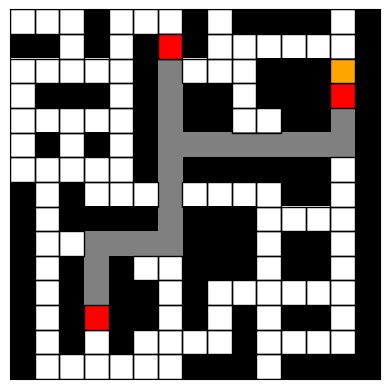

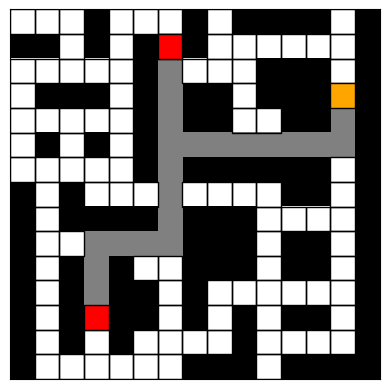

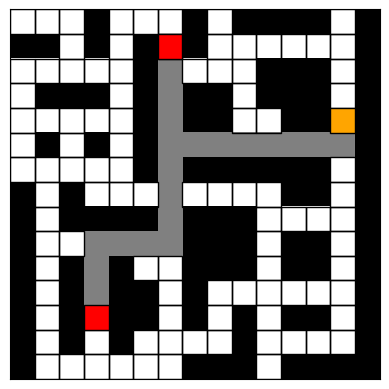

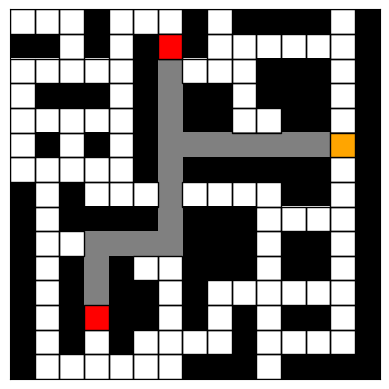

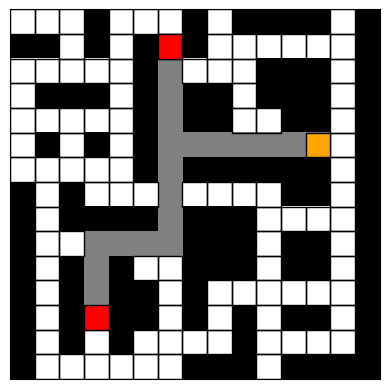

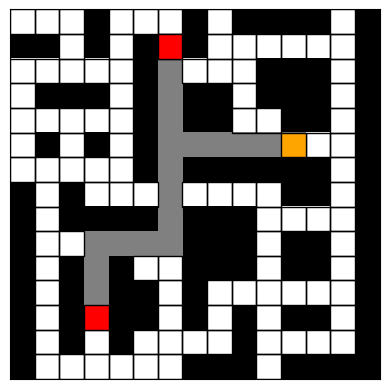

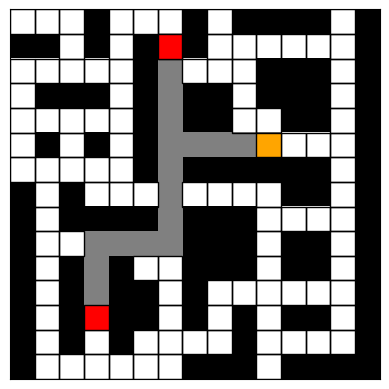

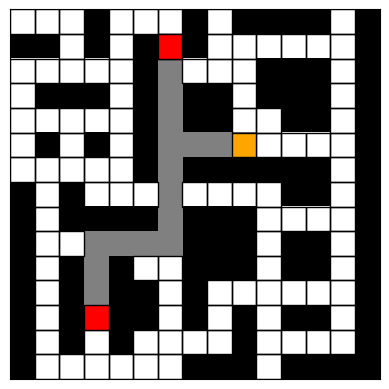

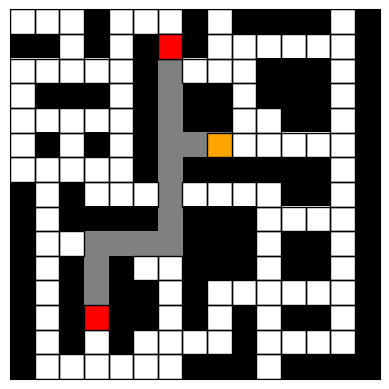

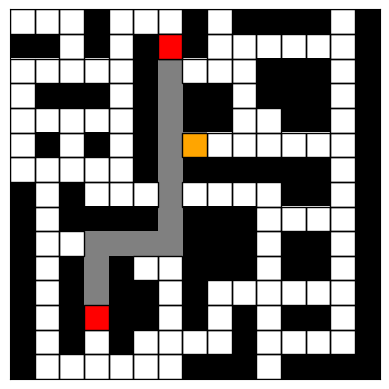

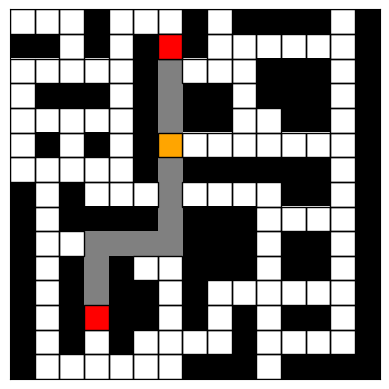

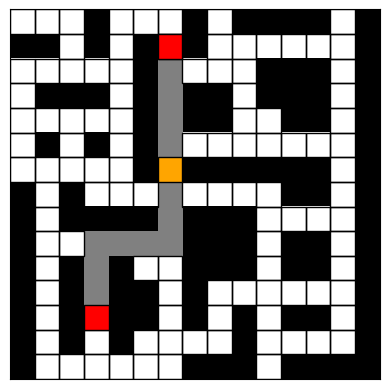

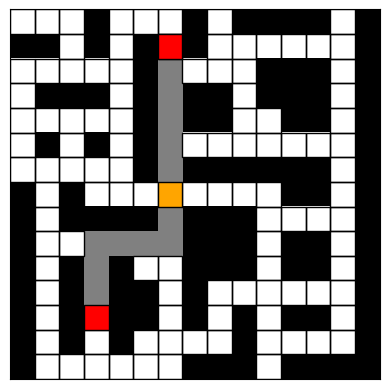

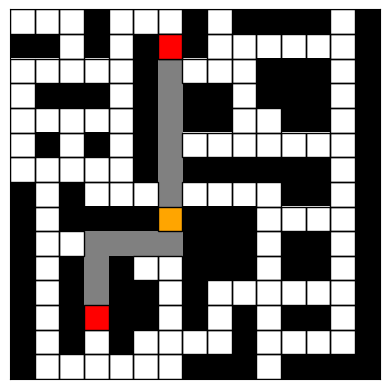

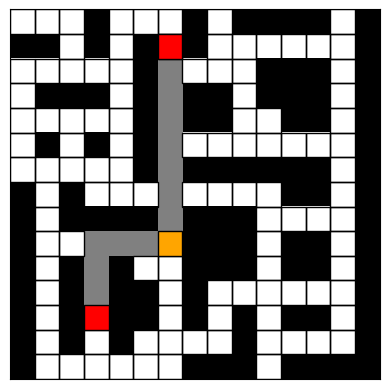

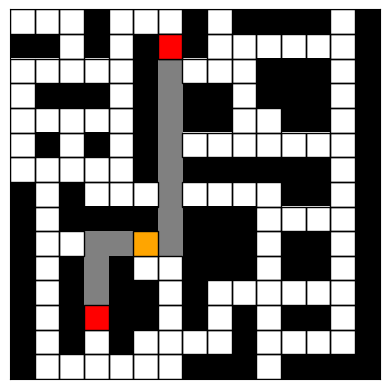

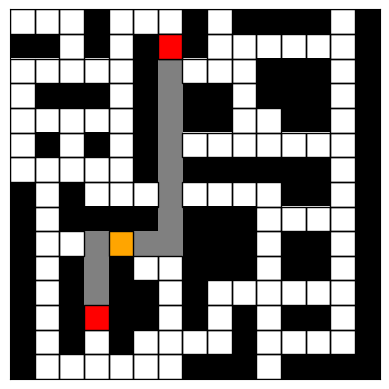

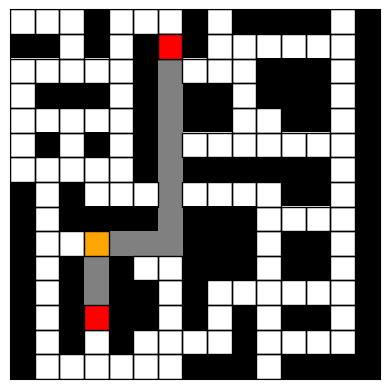

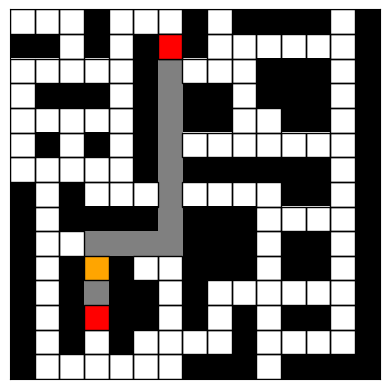

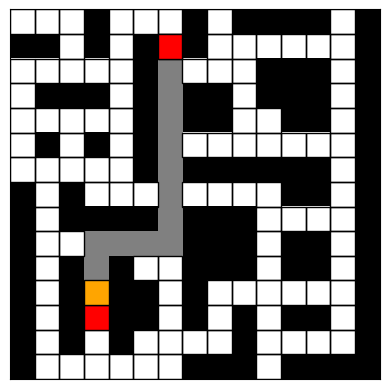

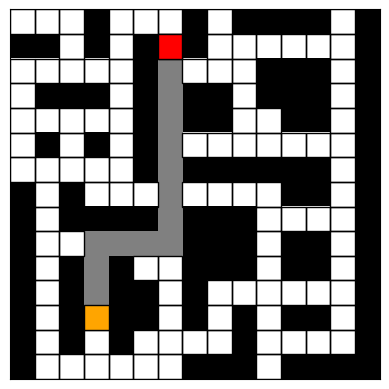

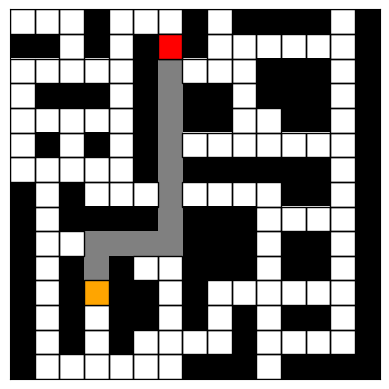

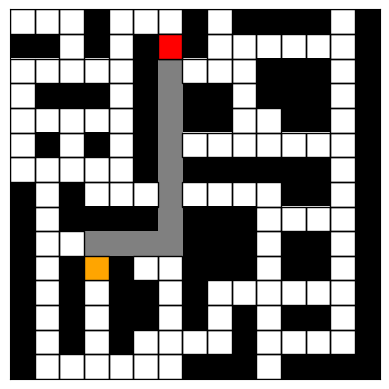

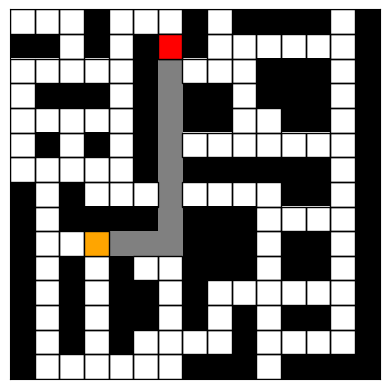

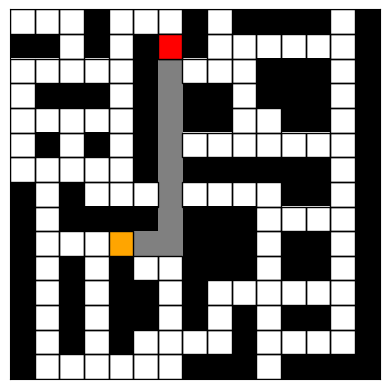

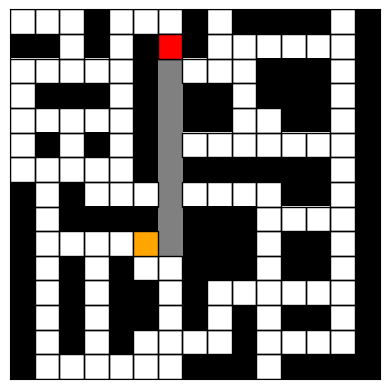

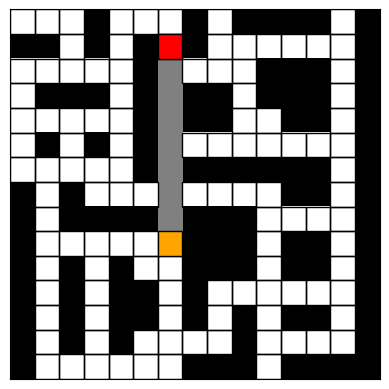

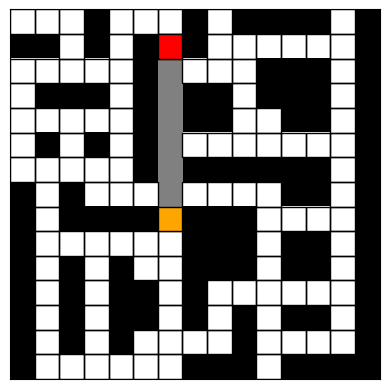

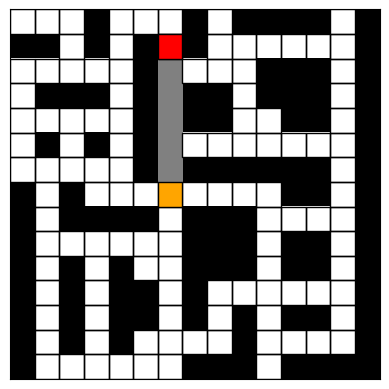

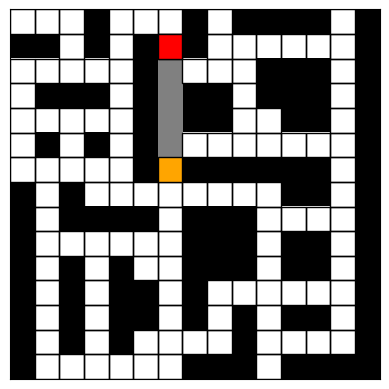

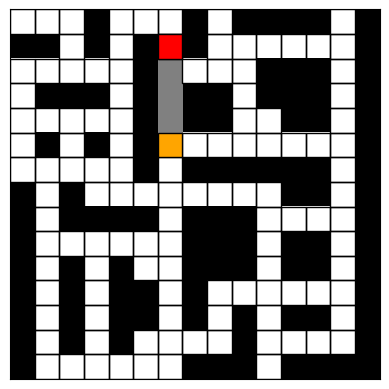

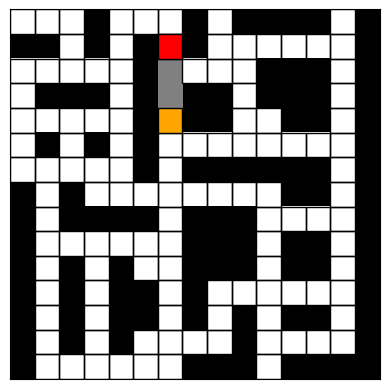

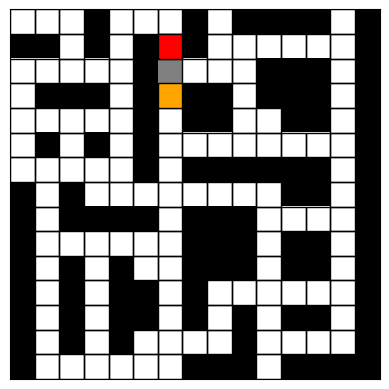

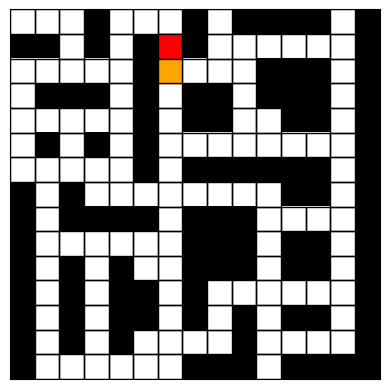

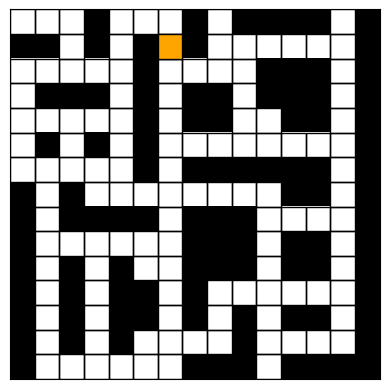

In [ ]:
for i in op: # agent navigates between points
  maze1 = maze.copy()
  if i == 0:
    points[0] = (points[0][0],points[0][1]-1)
  elif i == 1:
    points[0] = (points[0][0],points[0][1]+1)
  elif i == 2:
    points[0] = (points[0][0]-1,points[0][1])
  elif i == 3:
    points[0] = (points[0][0]+1,points[0][1])
  opt = []
  if points[0] == points[1]:
    points.remove(points[0])
  for i in range(len(points)-1):
    maze1,optimal_path = train(maze1,points[i],points[i+1])
    opt.append(optimal_path)
  show_maze_out(maze1,points)

  #show.maze.append()

### One Agent Rerouting - Block/Open

In [ ]:
points = [(6,1),(6,6),(0,5),(6,1)]

In [ ]:
#distrupted maze
dis_maze = np.array([
    [ 1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.],
    [ 0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
    [ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.],
    [ 1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.],
    [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.],
    [ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
    [ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.],
    [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.],
    [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
])

4


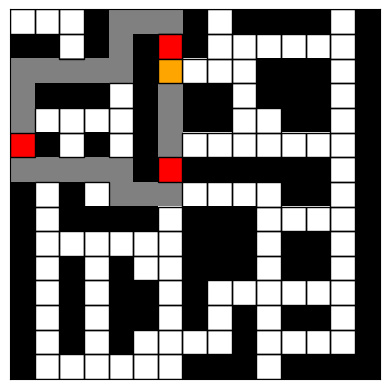

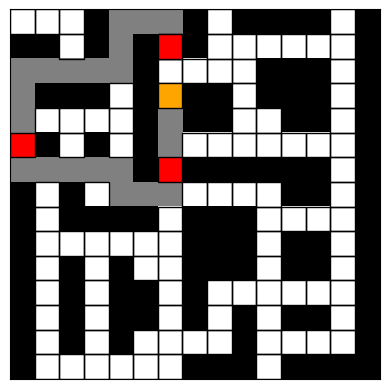

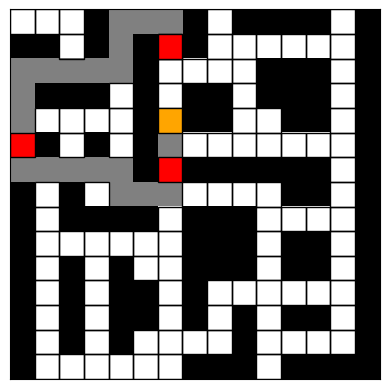

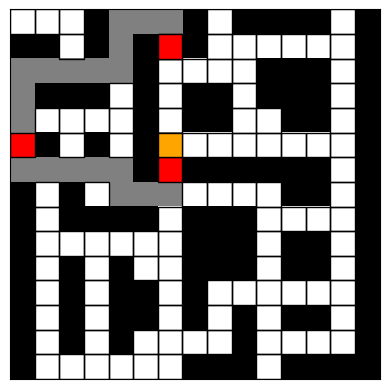

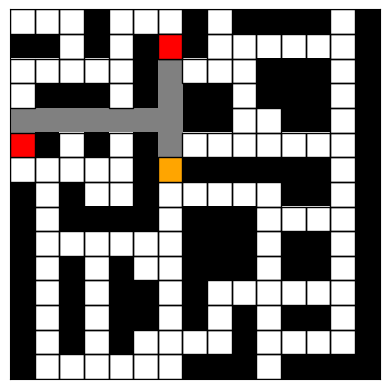

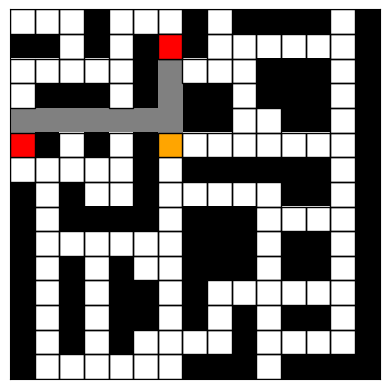

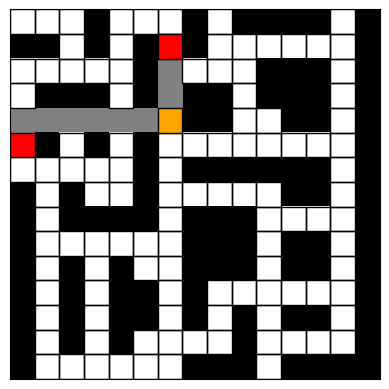

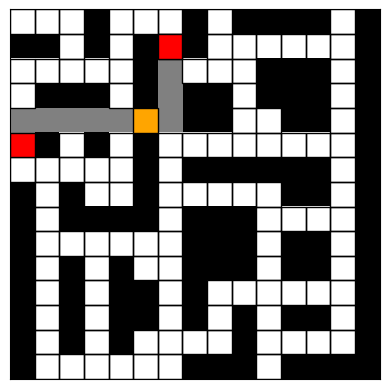

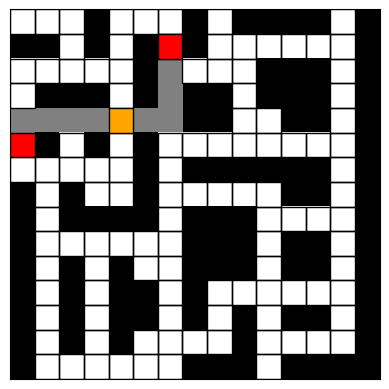

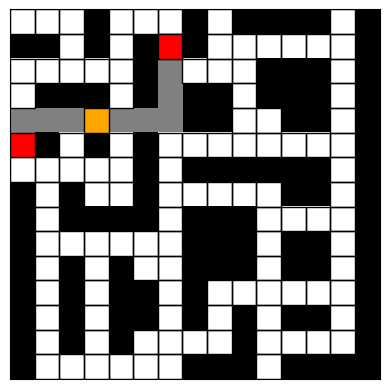

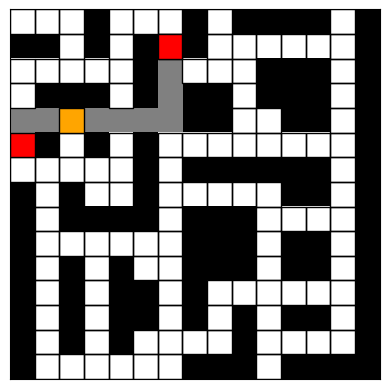

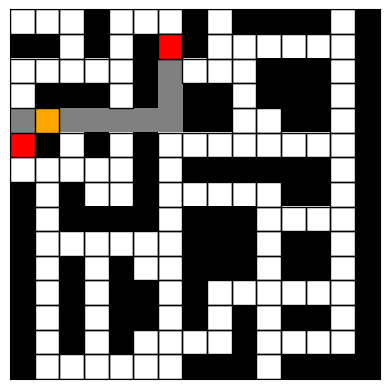

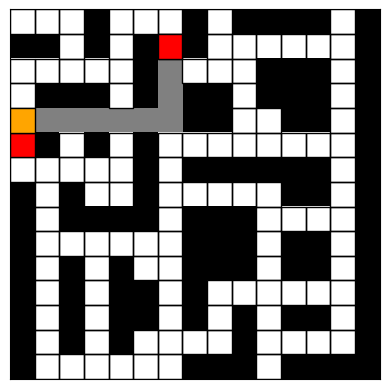

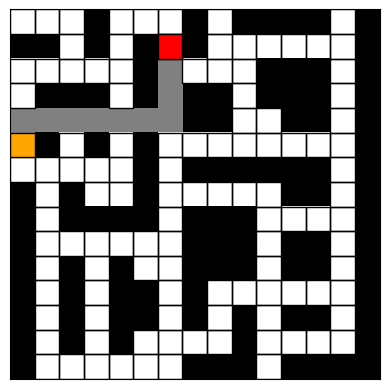

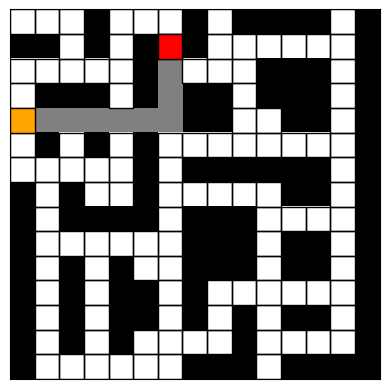

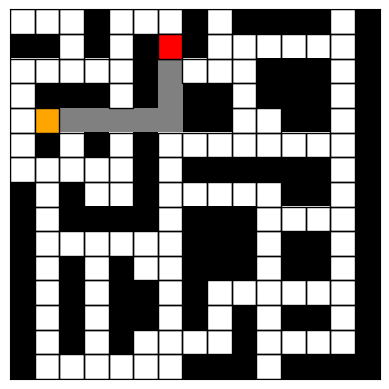

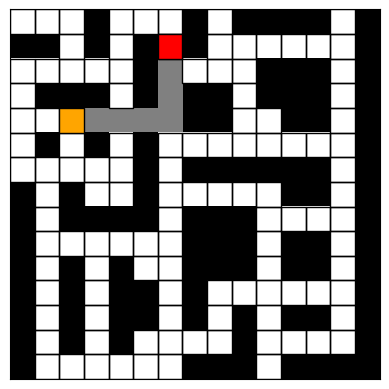

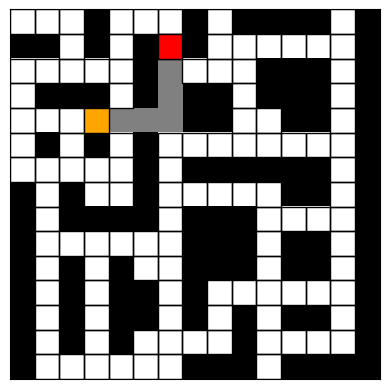

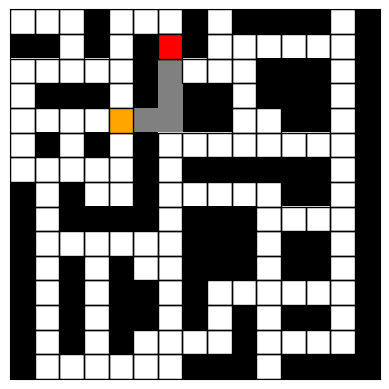

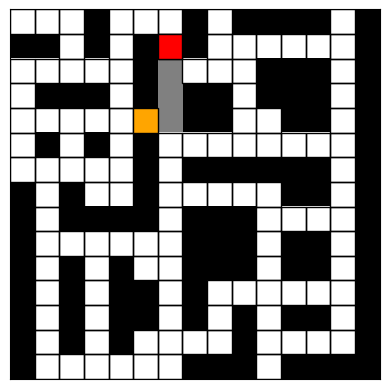

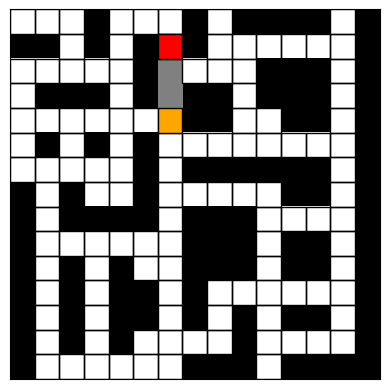

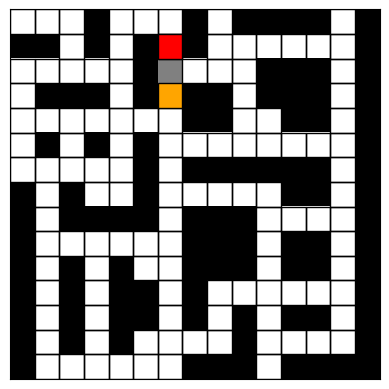

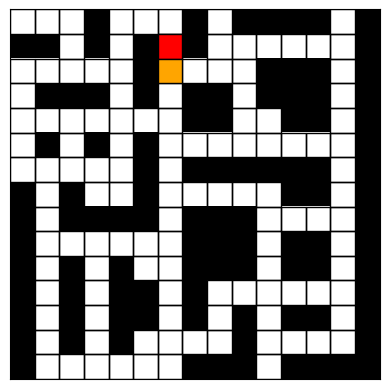

In [ ]:
count = 0
#rand1 = random.randrange(0, len(op), 1) #random step
rand1 = 4 # defined step which a wall blocks/open a path
print(rand1)

while(len(op) != 1):
  maze1 = maze_copy.copy()
  if count == rand1:
    maze_copy = dis_maze.copy()
    maze1 = maze_copy.copy()
  if op[0] == 0:
    points[0] = (points[0][0],points[0][1]-1)
  elif op[0] == 1:
    points[0] = (points[0][0],points[0][1]+1)
  elif op[0] == 2:
    points[0] = (points[0][0]-1,points[0][1])
  elif op[0] == 3:
    points[0] = (points[0][0]+1,points[0][1])
  opt = []
  if points[0] == points[1]:
    points.remove(points[0])
  for i in range(len(points)-1):
    maze1,optimal_path = train(maze1,points[i],points[i+1])
    opt.append(optimal_path)
  op = []
  for nums in opt:
    for val in nums:
      op.append(val)
  show_maze_out(maze1,points)

  count = count+1

### Multi Agent

In [ ]:
def show_maze_out(matrix,points,color):
  binary_image = np.where(matrix == 1, 1.0, np.where(matrix == 4, 0.5, 0.0))
  fig, ax = plt.subplots()

  ax.imshow(binary_image, cmap='gray', interpolation='nearest')

  for x in range(binary_image.shape[1]):
      for y in range(binary_image.shape[0]):
          if binary_image[y, x] == 1:
              rect = patches.Rectangle((x-0.5, y-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='none')
              ax.add_patch(rect)

          elif binary_image[y, x] == 4:
              path = patches.Rectanglepatches.Rectangle((x-0.5, y-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='green')
              ax.add_patch(path)


  #end_rect = patches.Rectangle((end_point[0]-0.5, end_point[1]-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='red')

  for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
      if matrix[i][j] == 4:
        p = patches.Rectangle((j-0.5, i-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor=str(color))
        ax.add_patch(p)

  for i in range(len(points)-1):
    junc = patches.Rectangle((points[i+1][0]-0.5, points[i+1][1]-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='red')
    ax.add_patch(junc)

  start_rect = patches.Rectangle((points[0][0]-0.5, points[0][1]-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='orange') #coordinates
  ax.add_patch(start_rect)


  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_xticklabels([])
  ax.set_yticklabels([])
  #plt.savefig(f"{name}.png", bbox_inches='tight', pad_inches=0.1)
  plt.show()

In [ ]:
def get_reward(maze,end):
  rows, cols = maze.shape
  rewards = np.zeros_like(maze, dtype=float)
  rewards[maze == 0] = -1
  rewards[end[1], end[0]] = 1
  return rewards,rows,cols

In [ ]:
def choose_action(state, epsilon):
    if random.random() < epsilon:
        return random.randint(0, 3)  # Choose random action
    else:
        return np.argmax(Q[state[0], state[1]])

In [ ]:
def Q_learning(num_episodes,rows,cols,rewards,learning_rate,discount_factor,start,Q,end):
  for episode in range(num_episodes):
    state = (start[1], start[0])  # Start from the top-left corner
    done = False

    while not done:
        action = choose_action(state, epsilon=max(0.1, 1 - episode / num_episodes))  # Decreasing epsilon
        next_state = state
        if action == 0:  # Up
            next_state = (max(0, state[0] - 1), state[1])
        elif action == 1:  # Down
            next_state = (min(rows-1, state[0] + 1), state[1])
        elif action == 2:  # Left
            next_state = (state[0], max(0, state[1] - 1))
        elif action == 3:  # Right
            next_state = (state[0], min(cols-1, state[1] + 1))

        # Calculate the immediate reward
        immediate_reward = rewards[next_state[0], next_state[1]]

        # Update Q-value using the Bellman equation
        Q[state[0], state[1], action] += learning_rate * (immediate_reward + discount_factor * np.max(Q[next_state[0], next_state[1]]) - Q[state[0], state[1], action])

        state = next_state

        # Check if the goal is reached
        if state == (end[1], end[0]):
            done = True
  return Q

In [ ]:
def path(maze1,rows,cols,start,end,Q):
  optimal_path = []
  state = (start[1], start[0])
  while state != (end[1], end[0]):
      action = np.argmax(Q[state[0], state[1]])
      optimal_path.append(action)
      maze1[state[0], state[1]] = 4
      if action == 0:  # Up
          state = (max(0, state[0] - 1), state[1])
      elif action == 1:  # Down
          state = (min(rows-1, state[0] + 1), state[1])
      elif action == 2:  # Left
          state = (state[0], max(0, state[1] - 1))
      elif action == 3:  # Right
          state = (state[0], min(cols-1, state[1] + 1))
  return maze1,optimal_path

In [ ]:
#obstacles: 0
maze = np.array([
    [ 1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.],
    [ 0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
    [ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.],
    [ 1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.],
    [ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.],
    [ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
    [ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.],
    [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.],
    [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
])
maze_copy = maze.copy()
maze1 = maze.copy()
maze3 = maze.copy()

In [ ]:
maze.shape

(15, 15)

In [ ]:
dis_maze = np.array([
    [ 1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.],
    [ 0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
    [ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.],
    [ 1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.],
    [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.],
    [ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
    [ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.],
    [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.],
    [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
])

In [ ]:
start = (6,0) #start (x,y)
end = (6,0)   #end (x,y)
learning_rate = 0.8
discount_factor = 0.9
num_episodes = 1000

In [ ]:
rewards,rows,cols = get_reward(maze,end)

In [ ]:
Q = np.zeros((rows, cols, 4))

In [ ]:
def train(maze,start,end):
  rewards,rows,cols = get_reward(maze,end)
  Q1 = Q_learning(num_episodes,rows,cols,rewards,learning_rate,discount_factor,start,Q,end)
  maze2,optimal_path = path(maze,rows,cols,start,end,Q1)
  return maze2,optimal_path


In [ ]:
points1 = [[(6,7),(4,1),(0,5),(6,7)],
          [(6,7),(8,3),(13,2),(6,7)],
          [(6,7),(12,11),(4,14),(6,7)]]

In [ ]:
color = ['blue','cyan','green']

In [ ]:
num = [4,5,6]

In [ ]:
opt = []
for i in range(len(points)-1):
  maze1,optimal_path = train(maze1,points[i],points[i+1])
  opt.append(optimal_path)

In [ ]:
points1[0][0][0]

6

In [ ]:
def multi_agent(maze, points,color):
  maze_all = np.zeros(maze.shape)
  opt1 = []
  for j in range(len(points)):
    maze_test = maze.copy()
    #print(maze1)
    opt = []
    for i in range(len(points[j])-1):
      maze_test,optimal_path = train(maze_test,points[j][i],points[j][i+1])

      opt.append(optimal_path)
    #print(maze_test)
    #print(opt)
    maze_all = maze_all + maze_test
    opt1.append(opt)
    show_maze_out(maze_test,points[j],color[j])
  return opt1

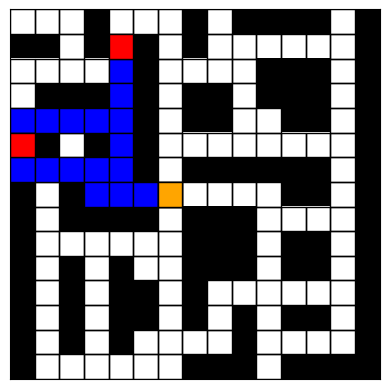

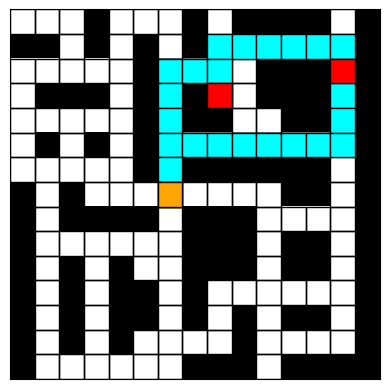

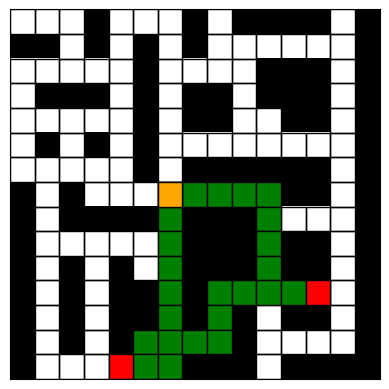

In [ ]:
opt = multi_agent(maze3,points1,color)

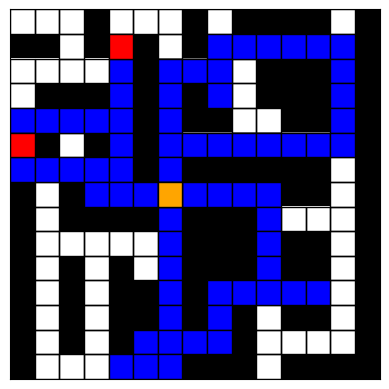

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

# ... (previous code remains the same)

def multi_agent(maze, points, color):
    maze_all = maze.copy()
    opt1 = []

    for j in range(len(points)):
        maze_test = maze.copy()
        opt = []
        for i in range(len(points[j])-1):
            maze_test, optimal_path = train(maze_test, points[j][i], points[j][i+1])
            opt.append(optimal_path)

        maze_all = np.maximum(maze_all, maze_test)

    show_maze_out(maze_all, points[0], color[0])  # Assuming the first set of points for display
    return opt1

opt = multi_agent(maze3, points1, color)



In [ ]:
def ani(opt,maze,points,color):
  op = []
  for nums in opt:
    for val in nums:
      op.append(val)
  for i in op:
    maze1_test = maze.copy()
    #print(points)
    if i == 0:
      points[0] = (points[0][0],points[0][1]-1)
    elif i == 1:
      points[0] = (points[0][0],points[0][1]+1)
    elif i == 2:
      points[0] = (points[0][0]-1,points[0][1])
    elif i == 3:
      points[0] = (points[0][0]+1,points[0][1])
    opt = []
    if points[0] == points[1]:
      points.remove(points[0])
    #print(points)
    for i in range(len(points)-1):
      maze1_test,optimal_path = train(maze1_test,points[i],points[i+1])
      opt.append(optimal_path)

    show_maze_out(maze1_test,points,color)

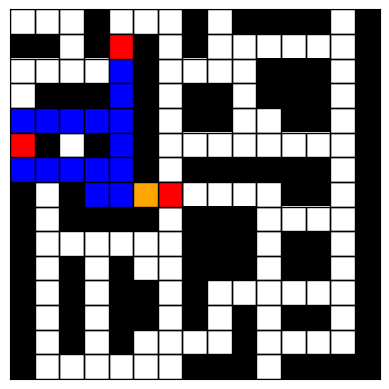

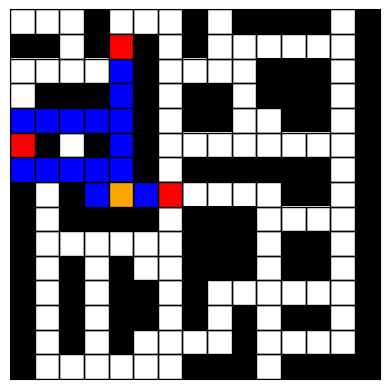

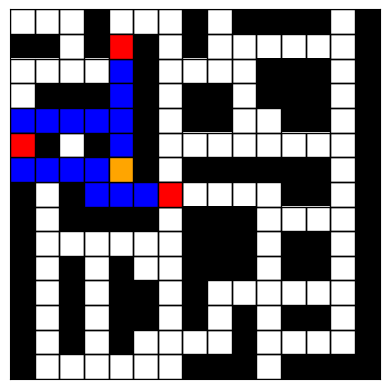

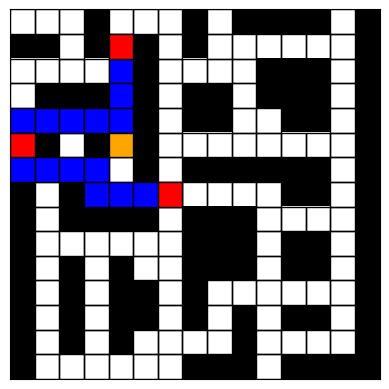

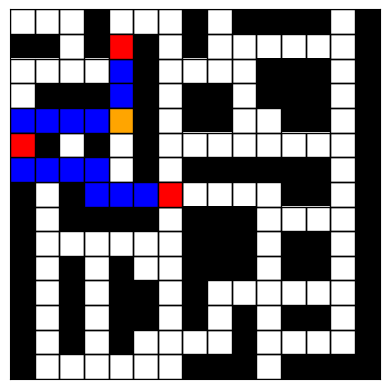

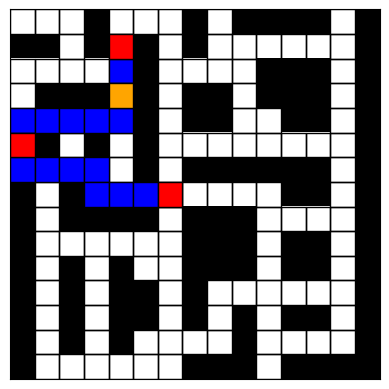

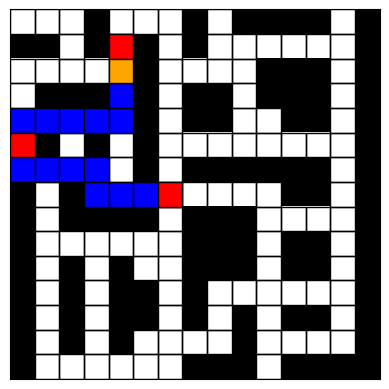

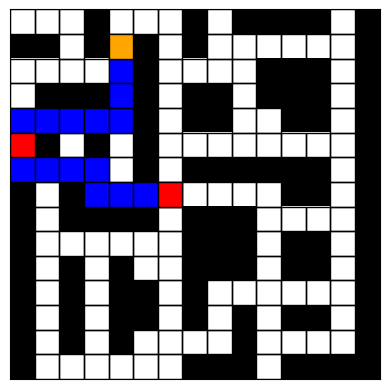

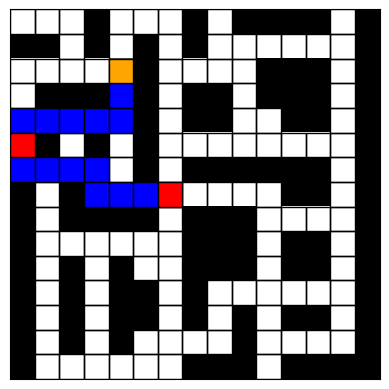

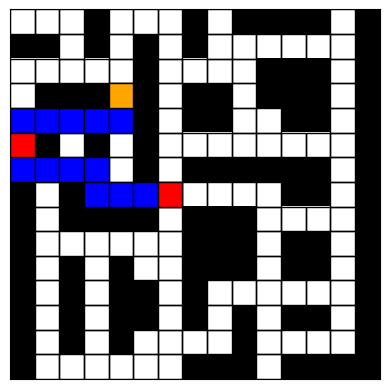

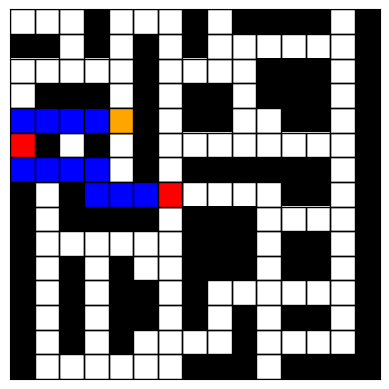

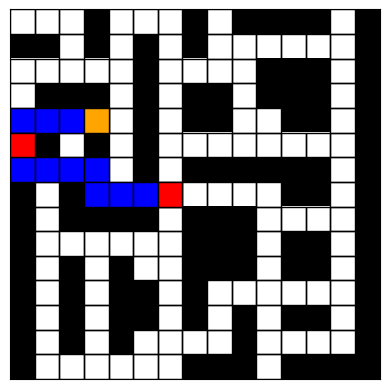

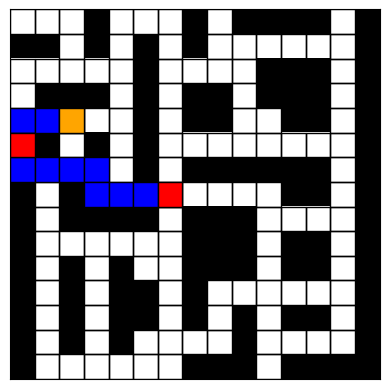

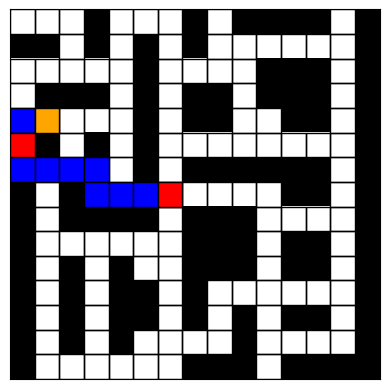

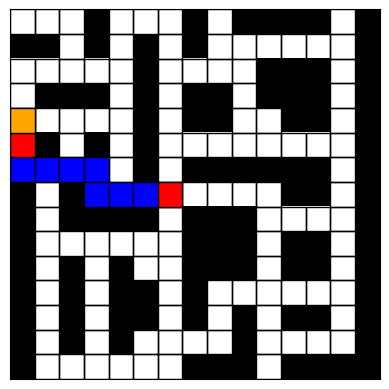

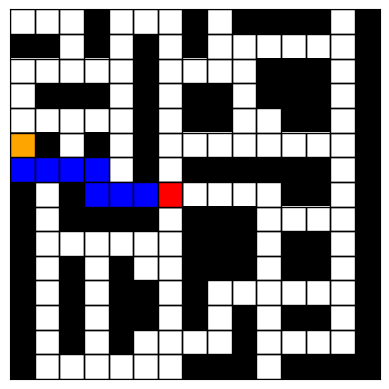

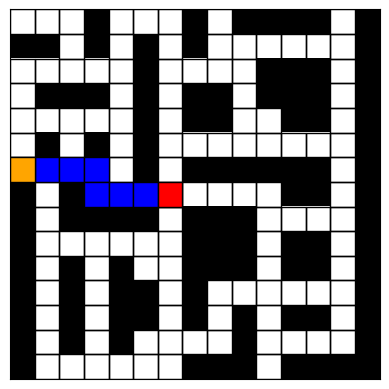

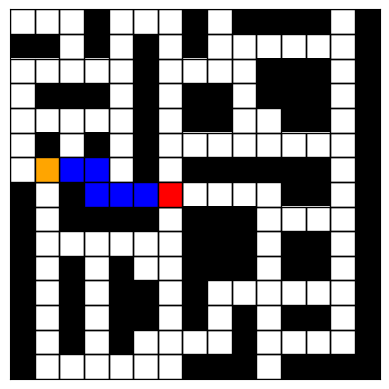

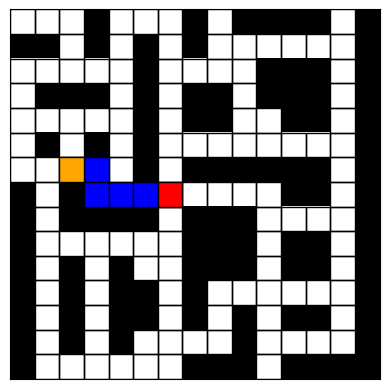

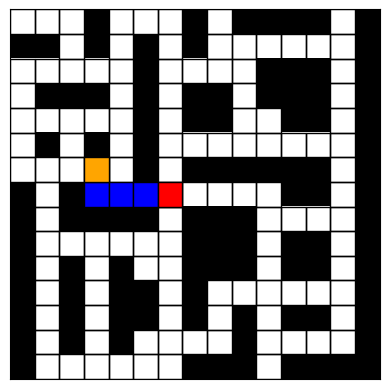

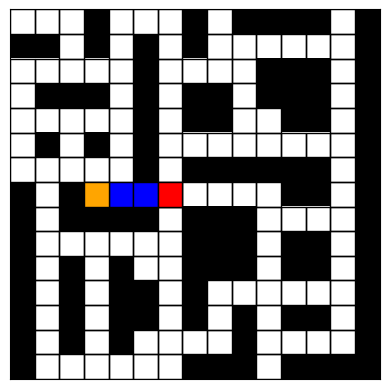

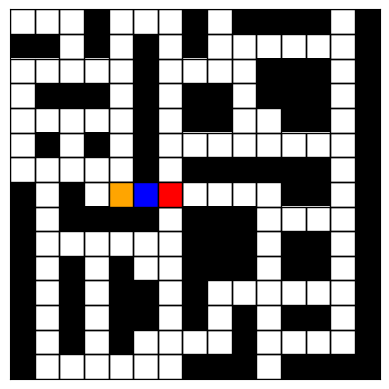

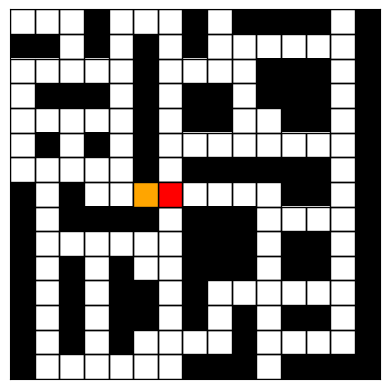

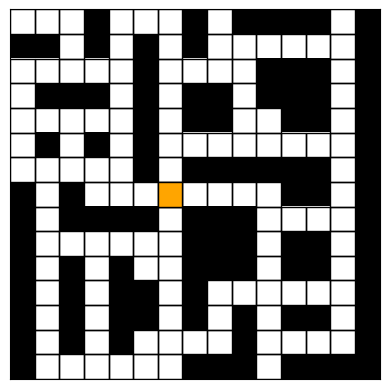

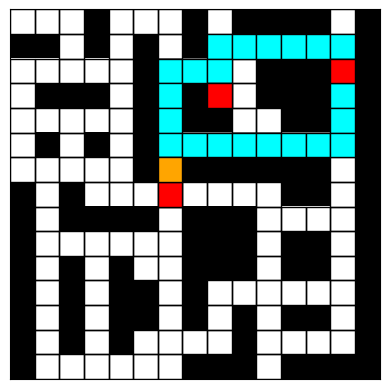

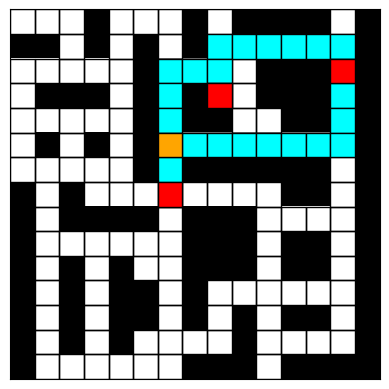

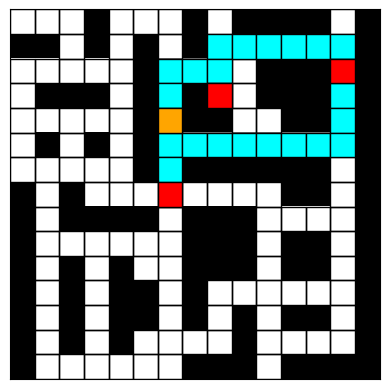

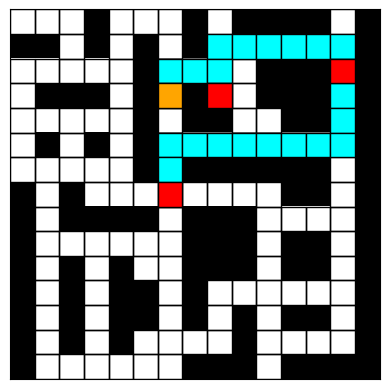

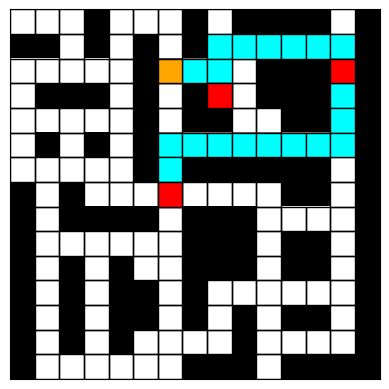

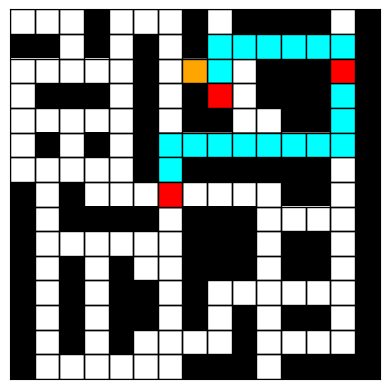

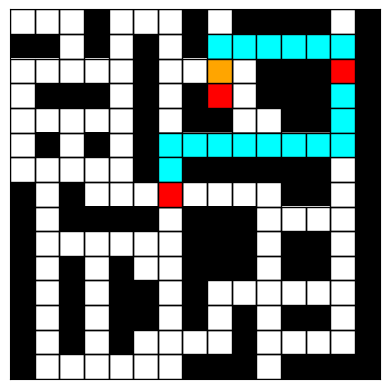

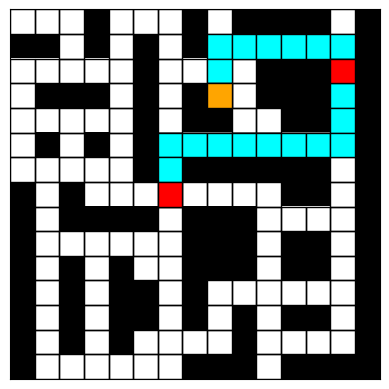

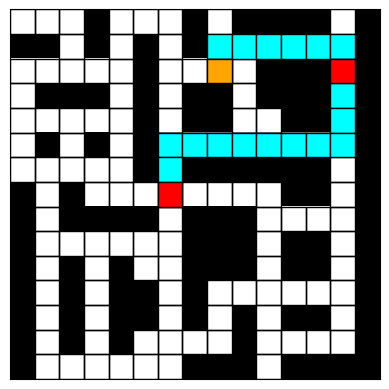

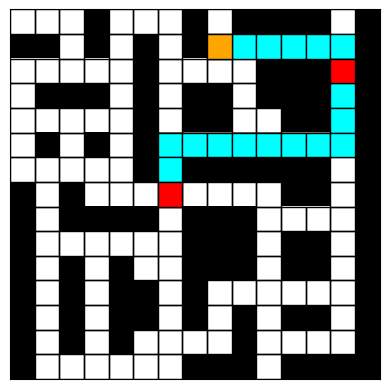

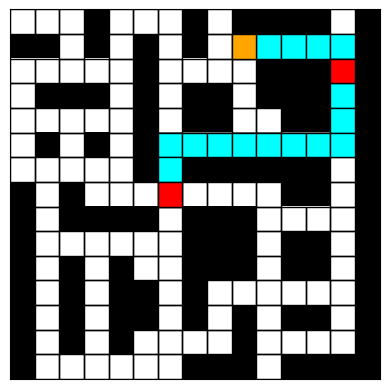

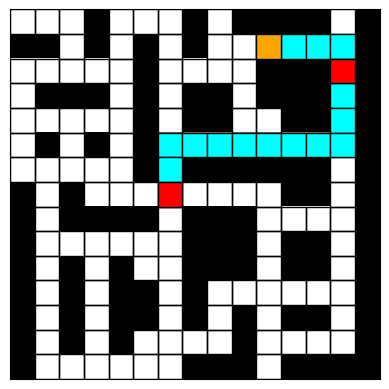

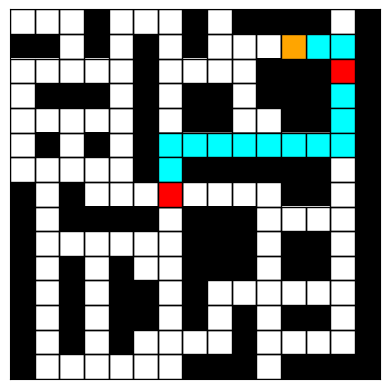

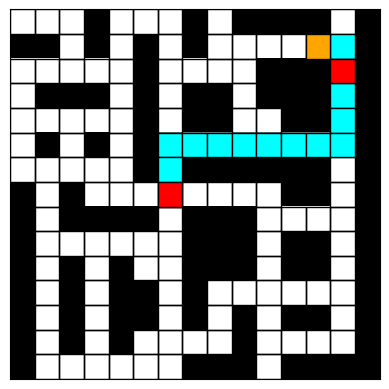

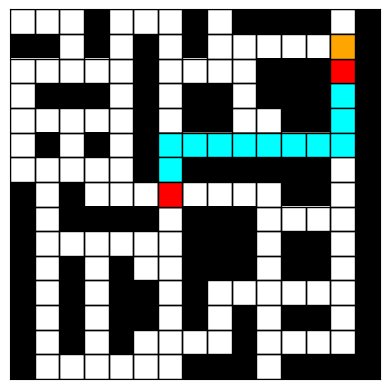

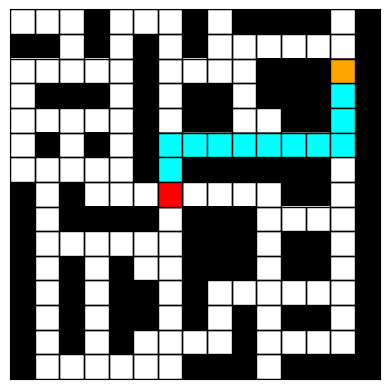

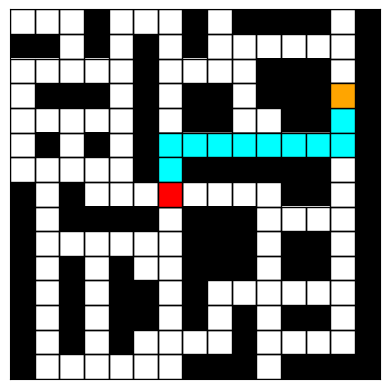

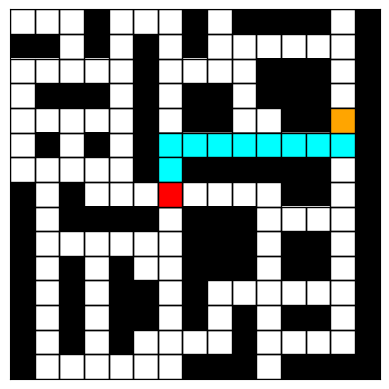

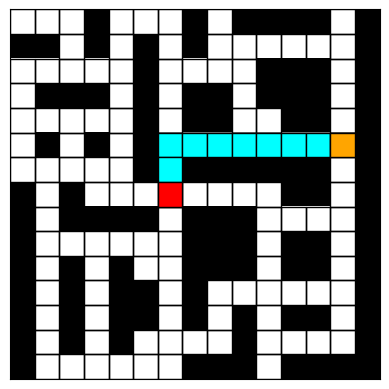

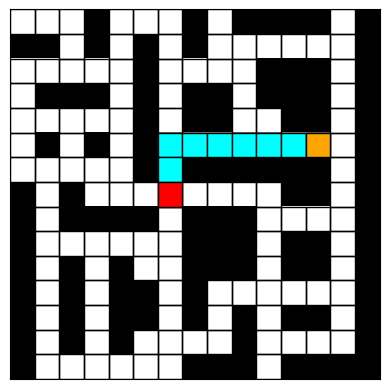

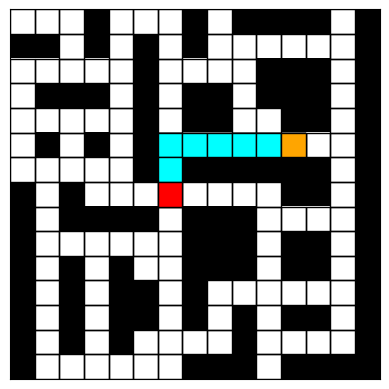

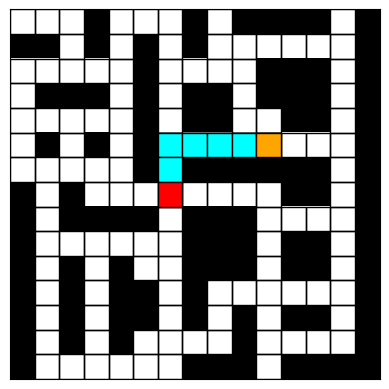

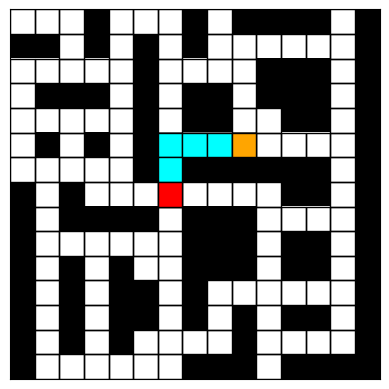

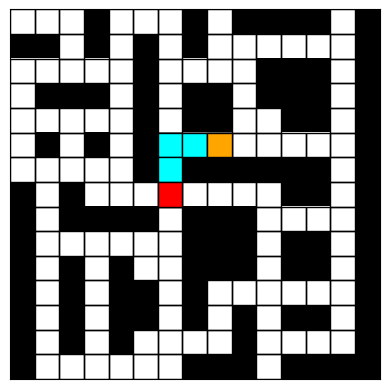

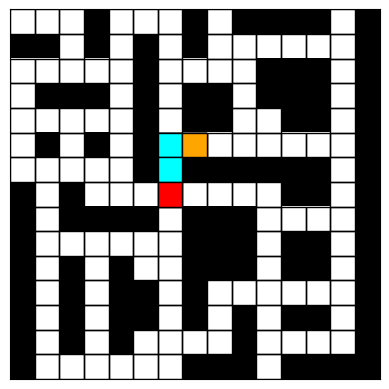

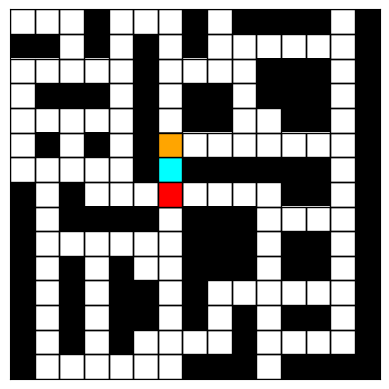

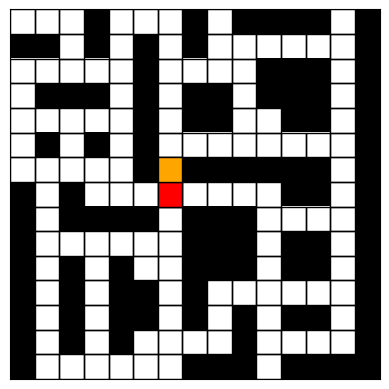

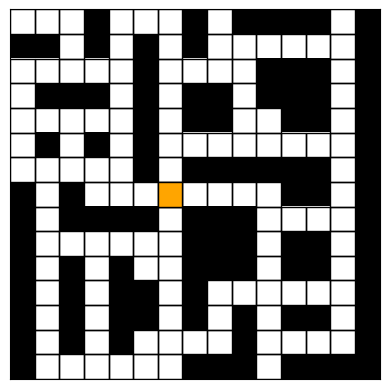

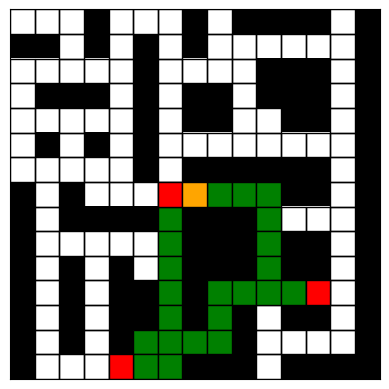

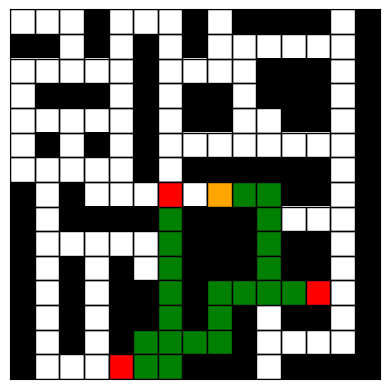

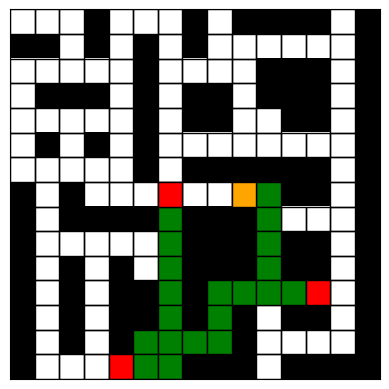

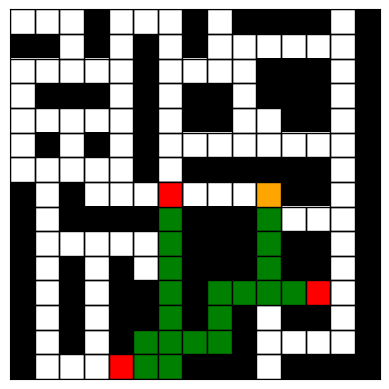

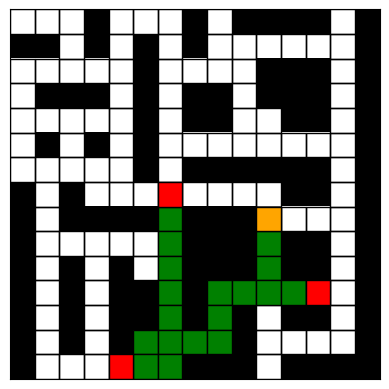

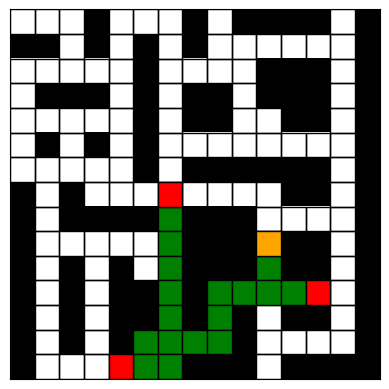

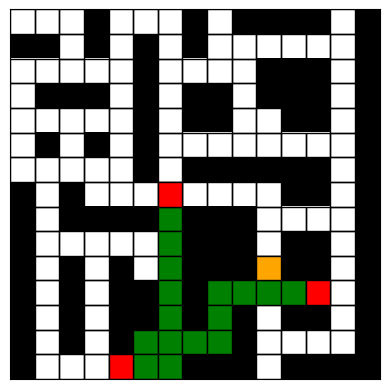

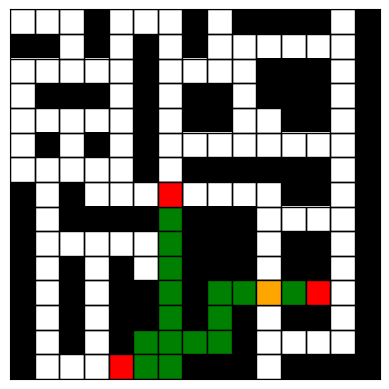

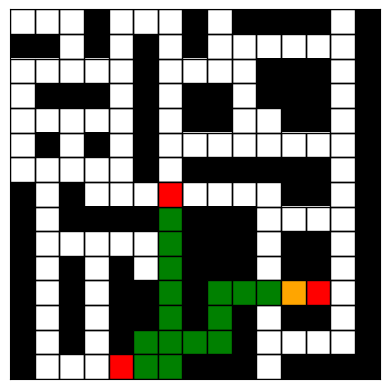

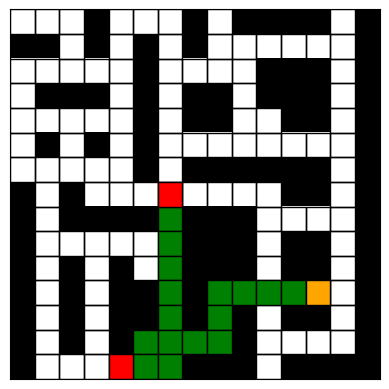

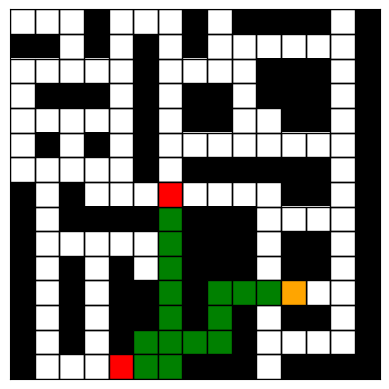

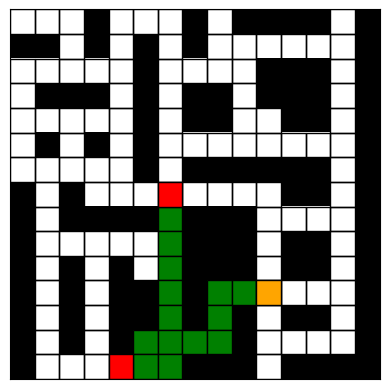

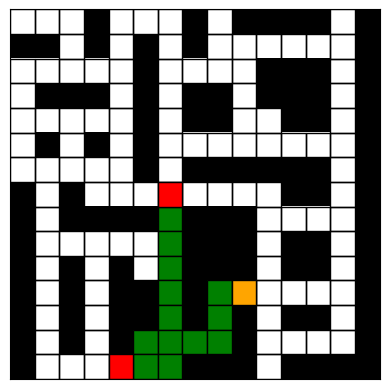

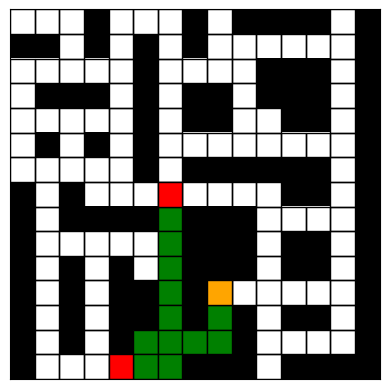

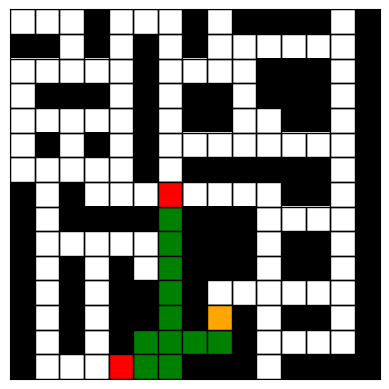

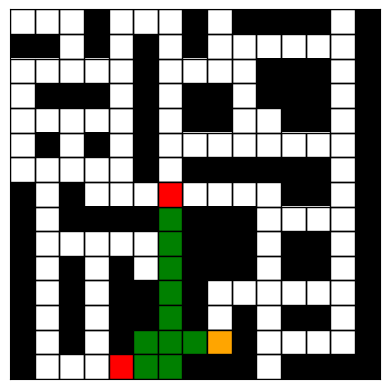

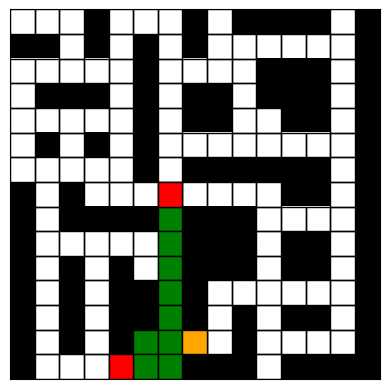

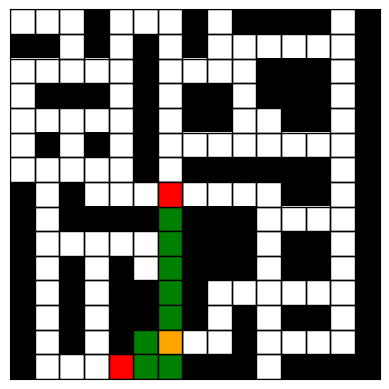

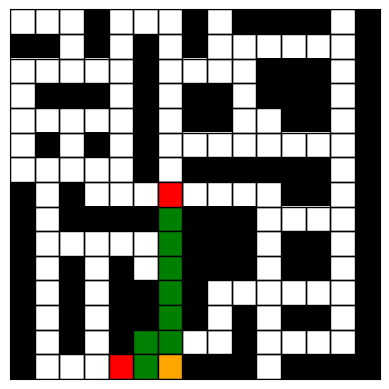

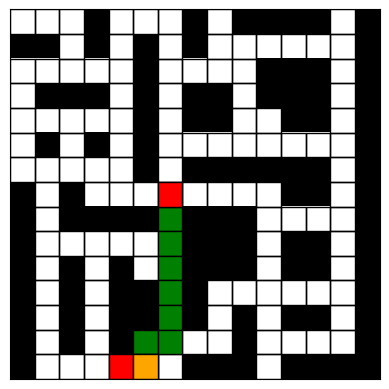

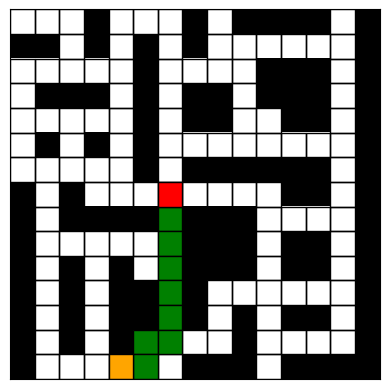

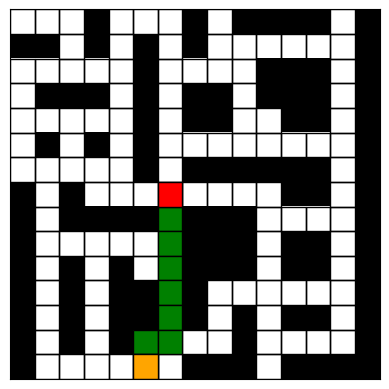

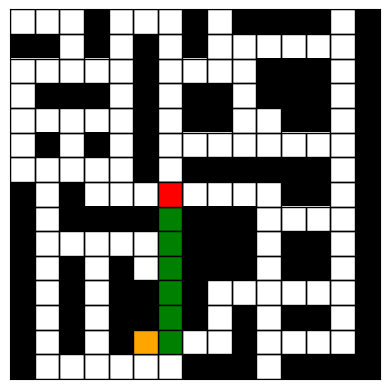

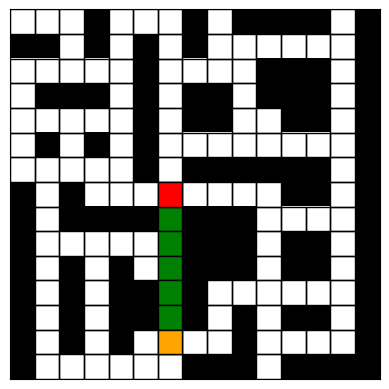

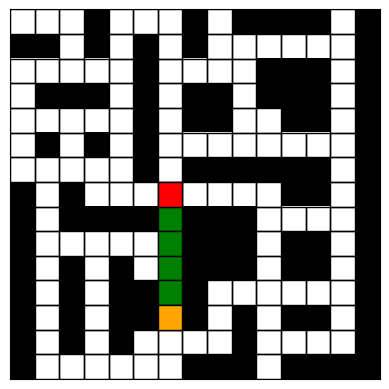

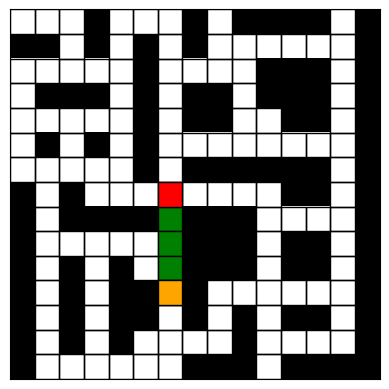

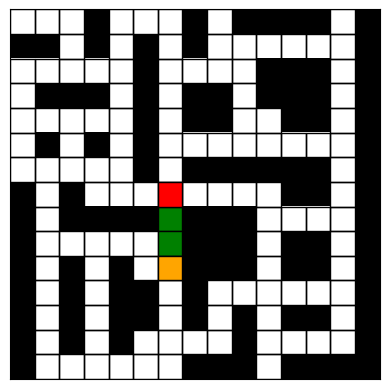

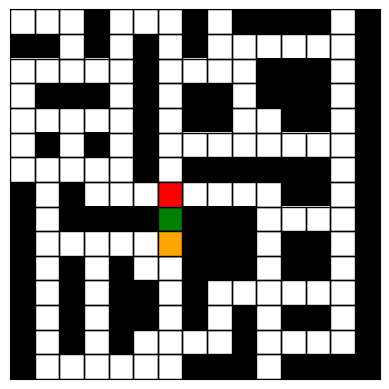

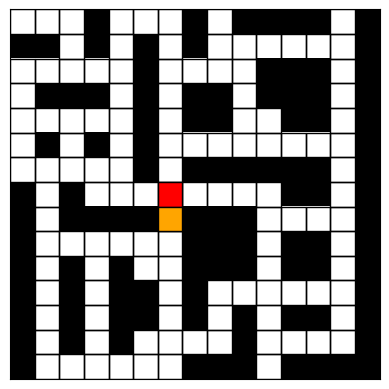

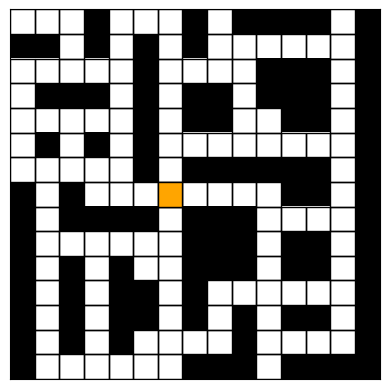

In [ ]:
for i in range(len(points1)):
  ani(opt[i],maze3,points1[i],color[i])

### Horizontally All Picture

In [ ]:
def show_maze_out(matrix,points,color):
  binary_image = np.where(matrix == 1, 1.0, np.where(matrix == 4, 0.5, 0.0))
  fig, ax = plt.subplots()

  ax.imshow(binary_image, cmap='gray', interpolation='nearest')

  for x in range(binary_image.shape[1]):
      for y in range(binary_image.shape[0]):
          if binary_image[y, x] == 1:
              rect = patches.Rectangle((x-0.5, y-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='none')
              ax.add_patch(rect)

          elif binary_image[y, x] == 4:
              path = patches.Rectanglepatches.Rectangle((x-0.5, y-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='green')
              ax.add_patch(path)


  #end_rect = patches.Rectangle((end_point[0]-0.5, end_point[1]-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='red')

  for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
      if matrix[i][j] == 4:
        p = patches.Rectangle((j-0.5, i-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor=str(color))
        ax.add_patch(p)

  for i in range(len(points)-1):
    junc = patches.Rectangle((points[i+1][0]-0.5, points[i+1][1]-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='red')
    ax.add_patch(junc)

  start_rect = patches.Rectangle((points[0][0]-0.5, points[0][1]-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='orange') #coordinates
  ax.add_patch(start_rect)


  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_xticklabels([])
  ax.set_yticklabels([])
  #plt.savefig(f"{name}.png", bbox_inches='tight', pad_inches=0.1)
  plt.show()

In [ ]:
def get_reward(maze,end):
  rows, cols = maze.shape
  rewards = np.zeros_like(maze, dtype=float)
  rewards[maze == 0] = -1
  rewards[end[1], end[0]] = 1
  return rewards,rows,cols

In [ ]:
def choose_action(state, epsilon):
    if random.random() < epsilon:
        return random.randint(0, 3)  # Choose random action
    else:
        return np.argmax(Q[state[0], state[1]])

In [ ]:
def Q_learning(num_episodes,rows,cols,rewards,learning_rate,discount_factor,start,Q,end):
  for episode in range(num_episodes):
    state = (start[1], start[0])  # Start from the top-left corner
    done = False

    while not done:
        action = choose_action(state, epsilon=max(0.1, 1 - episode / num_episodes))  # Decreasing epsilon
        next_state = state
        if action == 0:  # Up
            next_state = (max(0, state[0] - 1), state[1])
        elif action == 1:  # Down
            next_state = (min(rows-1, state[0] + 1), state[1])
        elif action == 2:  # Left
            next_state = (state[0], max(0, state[1] - 1))
        elif action == 3:  # Right
            next_state = (state[0], min(cols-1, state[1] + 1))

        # Calculate the immediate reward
        immediate_reward = rewards[next_state[0], next_state[1]]

        # Update Q-value using the Bellman equation
        Q[state[0], state[1], action] += learning_rate * (immediate_reward + discount_factor * np.max(Q[next_state[0], next_state[1]]) - Q[state[0], state[1], action])

        state = next_state

        # Check if the goal is reached
        if state == (end[1], end[0]):
            done = True
  return Q

In [ ]:
def path(maze1,rows,cols,start,end,Q):
  optimal_path = []
  state = (start[1], start[0])
  while state != (end[1], end[0]):
      action = np.argmax(Q[state[0], state[1]])
      optimal_path.append(action)
      maze1[state[0], state[1]] = 4
      if action == 0:  # Up
          state = (max(0, state[0] - 1), state[1])
      elif action == 1:  # Down
          state = (min(rows-1, state[0] + 1), state[1])
      elif action == 2:  # Left
          state = (state[0], max(0, state[1] - 1))
      elif action == 3:  # Right
          state = (state[0], min(cols-1, state[1] + 1))
  return maze1,optimal_path

In [ ]:
#obstacles: 0
maze = np.array([
    [ 1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.],
    [ 0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
    [ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.],
    [ 1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.],
    [ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.],
    [ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
    [ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.],
    [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.],
    [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
])
maze_copy = maze.copy()
maze1 = maze.copy()
maze3 = maze.copy()

In [ ]:
maze.shape

(15, 15)

In [ ]:
dis_maze = np.array([
    [ 1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.],
    [ 0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
    [ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.],
    [ 1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.],
    [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.],
    [ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
    [ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.],
    [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.],
    [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
])

In [ ]:
start = (6,0) #start (x,y)
end = (6,0)   #end (x,y)
learning_rate = 0.8
discount_factor = 0.9
num_episodes = 1000

In [ ]:
rewards,rows,cols = get_reward(maze,end)

In [ ]:
Q = np.zeros((rows, cols, 4))

In [ ]:
def train(maze,start,end):
  rewards,rows,cols = get_reward(maze,end)
  Q1 = Q_learning(num_episodes,rows,cols,rewards,learning_rate,discount_factor,start,Q,end)
  maze2,optimal_path = path(maze,rows,cols,start,end,Q1)
  return maze2,optimal_path


In [ ]:
points1 = [[(6,7),(4,1),(0,5),(6,7)],
          [(6,7),(8,3),(13,2),(6,7)],
          [(6,7),(12,11),(4,14),(6,7)]]

In [ ]:
color = ['blue','cyan','green']

In [ ]:
num = [4,5,6]

In [ ]:
def multi_agent(maze, points,color):
  maze_all = np.zeros(maze.shape)
  opt1 = []
  for j in range(len(points)):
    maze_test = maze.copy()
    #print(maze1)
    opt = []
    for i in range(len(points[j])-1):
      maze_test,optimal_path = train(maze_test,points[j][i],points[j][i+1])

      opt.append(optimal_path)
    #print(maze_test)
    #print(opt)
    maze_all = maze_all + maze_test
    opt1.append(opt)
    show_maze_out(maze_test,points[j],color[j])
  return opt1

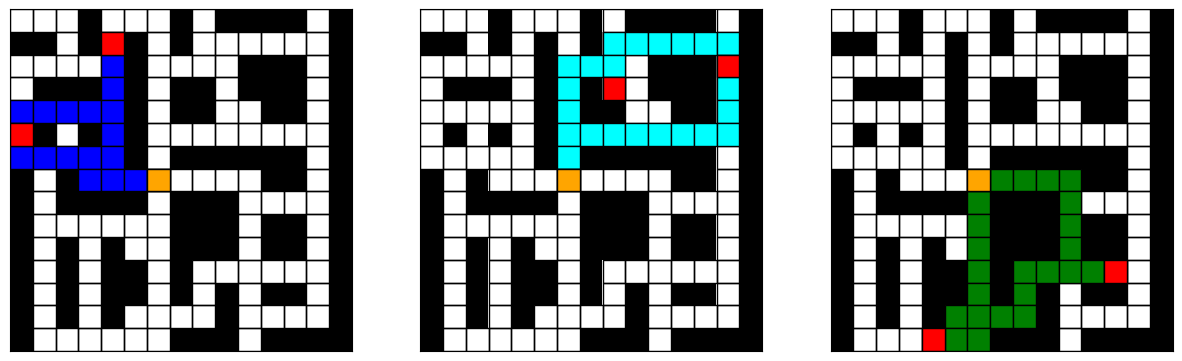

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

def show_maze_out(matrix, points, color, ax):
    binary_image = np.where(matrix == 1, 1.0, np.where(matrix == 4, 0.5, 0.0))

    ax.imshow(binary_image, cmap='gray', interpolation='nearest')

    for x in range(binary_image.shape[1]):
        for y in range(binary_image.shape[0]):
            if binary_image[y, x] == 1:
                rect = patches.Rectangle((x - 0.5, y - 0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='none')
                ax.add_patch(rect)
            elif binary_image[y, x] == 4:
                path = patches.Rectangle((x - 0.5, y - 0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='green')
                ax.add_patch(path)

    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if matrix[i][j] == 4:
                p = patches.Rectangle((j - 0.5, i - 0.5), 1, 1, linewidth=1, edgecolor='black', facecolor=str(color))
                ax.add_patch(p)

    for i in range(len(points) - 1):
        junc = patches.Rectangle((points[i + 1][0] - 0.5, points[i + 1][1] - 0.5), 1, 1, linewidth=1, edgecolor='black',
                                 facecolor='red')
        ax.add_patch(junc)

    start_rect = patches.Rectangle((points[0][0] - 0.5, points[0][1] - 0.5), 1, 1, linewidth=1, edgecolor='black',
                                   facecolor='orange')  # coordinates
    ax.add_patch(start_rect)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

def multi_agent(maze, points, color):
    fig, axs = plt.subplots(1, len(points), figsize=(15, 5))  # Create a 1x3 grid of subplots

    for i, (point_set, col) in enumerate(zip(points, color)):
        maze_test = maze.copy()
        for j in range(len(point_set) - 1):
            maze_test, _ = train(maze_test, point_set[j], point_set[j + 1])
        show_maze_out(maze_test, point_set, col, axs[i])

    plt.show()

multi_agent(maze3, points1, color)


### All in One

In [ ]:
def show_maze_out(matrix,points,color):
  binary_image = np.where(matrix == 1, 1.0, np.where(matrix == 4, 0.5, 0.0))
  fig, ax = plt.subplots()

  ax.imshow(binary_image, cmap='gray', interpolation='nearest')

  for x in range(binary_image.shape[1]):
      for y in range(binary_image.shape[0]):
          if binary_image[y, x] == 1:
              rect = patches.Rectangle((x-0.5, y-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='none')
              ax.add_patch(rect)

          elif binary_image[y, x] == 4:
              path = patches.Rectanglepatches.Rectangle((x-0.5, y-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='green')
              ax.add_patch(path)


  #end_rect = patches.Rectangle((end_point[0]-0.5, end_point[1]-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='red')

  for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
      if matrix[i][j] == 4:
        p = patches.Rectangle((j-0.5, i-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor=str(color))
        ax.add_patch(p)

  for i in range(len(points)-1):
    junc = patches.Rectangle((points[i+1][0]-0.5, points[i+1][1]-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='red')
    ax.add_patch(junc)

  start_rect = patches.Rectangle((points[0][0]-0.5, points[0][1]-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='orange') #coordinates
  ax.add_patch(start_rect)


  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_xticklabels([])
  ax.set_yticklabels([])
  #plt.savefig(f"{name}.png", bbox_inches='tight', pad_inches=0.1)
  plt.show()

In [ ]:
def get_reward(maze,end):
  rows, cols = maze.shape
  rewards = np.zeros_like(maze, dtype=float)
  rewards[maze == 0] = -1
  rewards[end[1], end[0]] = 1
  return rewards,rows,cols

In [ ]:
def choose_action(state, epsilon):
    if random.random() < epsilon:
        return random.randint(0, 3)  # Choose random action
    else:
        return np.argmax(Q[state[0], state[1]])

In [ ]:
def Q_learning(num_episodes,rows,cols,rewards,learning_rate,discount_factor,start,Q,end):
  for episode in range(num_episodes):
    state = (start[1], start[0])  # Start from the top-left corner
    done = False

    while not done:
        action = choose_action(state, epsilon=max(0.1, 1 - episode / num_episodes))  # Decreasing epsilon
        next_state = state
        if action == 0:  # Up
            next_state = (max(0, state[0] - 1), state[1])
        elif action == 1:  # Down
            next_state = (min(rows-1, state[0] + 1), state[1])
        elif action == 2:  # Left
            next_state = (state[0], max(0, state[1] - 1))
        elif action == 3:  # Right
            next_state = (state[0], min(cols-1, state[1] + 1))

        # Calculate the immediate reward
        immediate_reward = rewards[next_state[0], next_state[1]]

        # Update Q-value using the Bellman equation
        Q[state[0], state[1], action] += learning_rate * (immediate_reward + discount_factor * np.max(Q[next_state[0], next_state[1]]) - Q[state[0], state[1], action])

        state = next_state

        # Check if the goal is reached
        if state == (end[1], end[0]):
            done = True
  return Q

In [ ]:
def path(maze1,rows,cols,start,end,Q):
  optimal_path = []
  state = (start[1], start[0])
  while state != (end[1], end[0]):
      action = np.argmax(Q[state[0], state[1]])
      optimal_path.append(action)
      maze1[state[0], state[1]] = 4
      if action == 0:  # Up
          state = (max(0, state[0] - 1), state[1])
      elif action == 1:  # Down
          state = (min(rows-1, state[0] + 1), state[1])
      elif action == 2:  # Left
          state = (state[0], max(0, state[1] - 1))
      elif action == 3:  # Right
          state = (state[0], min(cols-1, state[1] + 1))
  return maze1,optimal_path

In [ ]:
#obstacles: 0
maze = np.array([
    [ 1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.],
    [ 0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
    [ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.],
    [ 1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.],
    [ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.],
    [ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
    [ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.],
    [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.],
    [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
])
maze_copy = maze.copy()
maze1 = maze.copy()
maze3 = maze.copy()

In [ ]:
maze.shape

(15, 15)

In [ ]:
dis_maze = np.array([
    [ 1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.],
    [ 0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
    [ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.],
    [ 1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.],
    [ 1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.],
    [ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
    [ 1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.],
    [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.],
    [ 0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.],
    [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
])

In [ ]:
start = (6,0) #start (x,y)
end = (6,0)   #end (x,y)
learning_rate = 0.8
discount_factor = 0.9
num_episodes = 1000

In [ ]:
rewards,rows,cols = get_reward(maze,end)

In [ ]:
Q = np.zeros((rows, cols, 4))

In [ ]:
def train(maze,start,end):
  rewards,rows,cols = get_reward(maze,end)
  Q1 = Q_learning(num_episodes,rows,cols,rewards,learning_rate,discount_factor,start,Q,end)
  maze2,optimal_path = path(maze,rows,cols,start,end,Q1)
  return maze2,optimal_path


In [ ]:
points1 = [[(6,7),(4,1),(0,5),(6,7)],
          [(6,7),(8,2),(13,2),(6,7)],
          [(6,7),(12,11),(4,14),(6,7)]]

In [ ]:
color = ['blue','cyan','green']

In [ ]:
num = [4,5,6]

In [ ]:
opt = []
for i in range(len(points)-1):
  maze1,optimal_path = train(maze1,points[i],points[i+1])
  opt.append(optimal_path)

In [ ]:
points1[0][0][0]

6

In [ ]:
from itertools import chain
def multi_agent(maze, points,color):
  maze_all = np.zeros(maze.shape)
  opt1 = []
  opt2 =[]
  all_maze = []
  for j in range(len(points)):
    maze_test = maze.copy()
    #print(maze1)
    opt = []
    for i in range(len(points[j])-1):
      maze_test,optimal_path = train(maze_test,points[j][i],points[j][i+1])


      opt.append(optimal_path)
    #print(maze_test)
    all_maze.append(np.array(maze_test))
    #print(opt)
    maze_all = maze_all + maze_test
    opt1.append(list(chain(*opt)))#list(chain(*opt))
    #opt2.append(list(chain(*opt)))
    #print(opt1)
  all_maze = np.array(all_maze)
  #opt1  = opt1[0:5]
  lenth = [len(sublist) for sublist in opt1]
  for i in range(np.max(lenth)+1):
    result_list = [sublist[:i] for sublist in opt1]
    show_maze_out1(maze,np.array(all_maze),points,color,3,result_list)
  #show_maze_out1(maze,np.array(all_maze),points,color,3,opt2)
  return opt1,all_maze

  #plt.show()

In [ ]:
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
def show_maze_out1(dis_maze,matrix,points,color,val,opt2):

  binary_image = np.where(dis_maze == 1, 1.0, np.where(dis_maze == 4, 0.5, 0.0))
  fig, ax = plt.subplots()

  ax.imshow(binary_image, cmap='gray', interpolation='nearest')

  for x in range(binary_image.shape[1]):
      for y in range(binary_image.shape[0]):
          if binary_image[y, x] == 1:
              rect = patches.Rectangle((x-0.5, y-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='none')
              ax.add_patch(rect)

          elif binary_image[y, x] == 4:
              path = patches.Rectanglepatches.Rectangle((x-0.5, y-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='green')
              ax.add_patch(path)

  #end_rect = patches.Rectangle((end_point[0]-0.5, end_point[1]-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='red')

  for k in range(0,matrix.shape[0]):#matrix.shape[0]
    step = 0
    j = points[k][0][0]
    i = points[k][0][1]


    for step in range(len(opt2[k])):

      if  opt2[k][step] == 0:
        #print(i,j,opt2[k][step])
        if step >0:
          if opt2[k][step-1] == 2:
            p = patches.Rectangle((j-0.5+k/val, i-0.5+k/val), 1, 1/val, linewidth=0, edgecolor='black', facecolor=str(color[k]))
          elif opt2[k][step-1] == 3:
            p = patches.Rectangle((j-0.5+k/val, i-0.5+k/val), 1/val, 1/val, linewidth=0, edgecolor='black', facecolor=str(color[k]))
          else:
            p = patches.Rectangle((j-0.5+k/val, i-0.5+k/val), 1/val, 1, linewidth=0, edgecolor='black', facecolor=str(color[k]))
        else:
          p = patches.Rectangle((j-0.5+k/val, i-0.5+k/val), 1/val, 1/val, linewidth=0, edgecolor='black', facecolor=str(color[k]))
        i = i-1

        ax.add_patch(p)
        #plt.pause(0.1)


      elif opt2[k][step] == 1:
        #print(i,j,opt2[k][step])
        if step >0:
          if opt2[k][step-1] == 2:
            p = patches.Rectangle((j-0.5+k/val, i-0.5+k/val), 1/val, 1, linewidth=0, edgecolor='black', facecolor=str(color[k]))
            ax.add_patch(p)
            p = patches.Rectangle((j-0.5+k/val, i-0.5+k/val), 1, 1/val, linewidth=0, edgecolor='black', facecolor=str(color[k]))
          elif opt2[k][step-1] == 3:
            p = patches.Rectangle((j-0.5+k/val, i-0.5+k/val), 1/val, 1, linewidth=0, edgecolor='black', facecolor=str(color[k]))
          else:
            p = patches.Rectangle((j-0.5+k/val, i-0.5+k/val), 1/val, 1, linewidth=0, edgecolor='black', facecolor=str(color[k]))
        else:
          p = patches.Rectangle((j-0.5+k/val, i-0.5+k/val), 1/val, 1/val, linewidth=0, edgecolor='black', facecolor=str(color[k]))
        i = i+1

        ax.add_patch(p)
        #plt.pause(0.1)


      elif opt2[k][step] == 2:
        #print(i,j,opt2[k][step])
        if step >0:
          if opt2[k][step-1] == 0:
            p = patches.Rectangle((j-0.5+k/val, i-0.5+k/val), 1/val, 1, linewidth=0, edgecolor='black', facecolor=str(color[k]))
          elif opt2[k][step-1] == 1:
            p = patches.Rectangle((j-0.5+k/val, i-0.5+k/val), 1/val, 1/val, linewidth=0, edgecolor='black', facecolor=str(color[k]))
          else:
            p = patches.Rectangle((j-0.5+k/val, i-0.5+k/val), 1, 1/val, linewidth=0, edgecolor='black', facecolor=str(color[k]))
        else:
          p = patches.Rectangle((j-0.5+k/val, i-0.5+k/val), 1/val, 1/val, linewidth=0, edgecolor='black', facecolor=str(color[k]))
        j = j-1

        ax.add_patch(p)
        #plt.pause(0.1)


      elif opt2[k][step] == 3:
        #print(i,j,step)
        if step >0:
          if opt2[k][step-1] == 0:
            p = patches.Rectangle((j-0.5+k/val, i-0.5+k/val), 1, 1/val, linewidth=0, edgecolor='black', facecolor=str(color[k]))
            ax.add_patch(p)
            p = patches.Rectangle((j-0.5+k/val, i-0.5+k/val), 1/val, 1, linewidth=0, edgecolor='black', facecolor=str(color[k]))
          elif opt2[k][step-1] == 1:
            p = patches.Rectangle((j-0.5+k/val, i-0.5+k/val), 1, 1/val, linewidth=0, edgecolor='black', facecolor=str(color[k]))
          else:
            p = patches.Rectangle((j-0.5+k/val, i-0.5+k/val), 1, 1/val, linewidth=0, edgecolor='black', facecolor=str(color[k]))
        else:
          p = patches.Rectangle((j-0.5+k/val, i-0.5+k/val), 1/val, 1/val, linewidth=0, edgecolor='black', facecolor=str(color[k]))
        j = j+1

        ax.add_patch(p)
        #plt.pause(0.1)

  for k in range(0,matrix.shape[0]):
    for i in range(len(points)):
      junc = patches.Rectangle((points[k][i+1][0]-0.5, points[k][i+1][1]-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='red')
      ax.add_patch(junc)

    start_rect = patches.Rectangle((points[k][0][0]-0.5, points[k][0][1]-0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='orange') #coordinates
    ax.add_patch(start_rect)

  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_xticklabels([])
  ax.set_yticklabels([])
  #plt.savefig(f"{name}.png", bbox_inches='tight', pad_inches=0.1)
  plt.show()






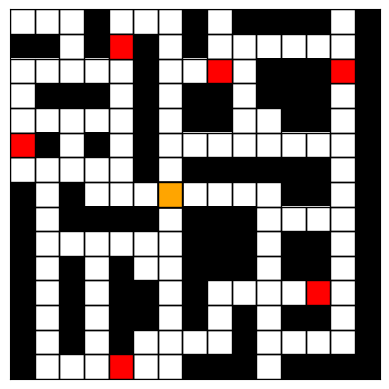

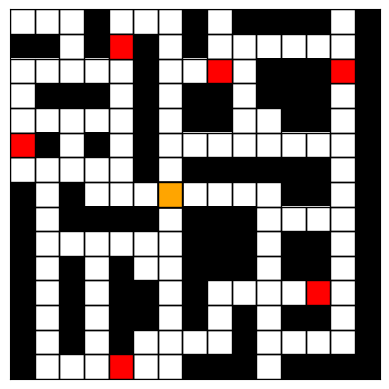

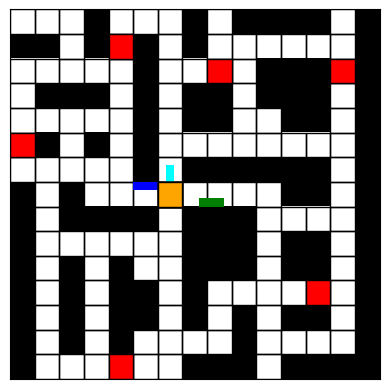

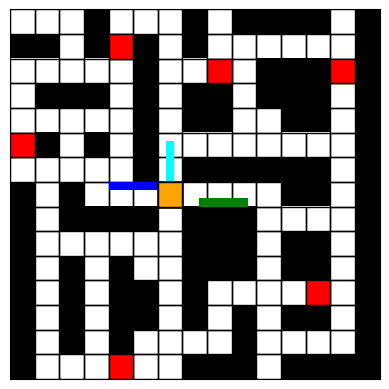

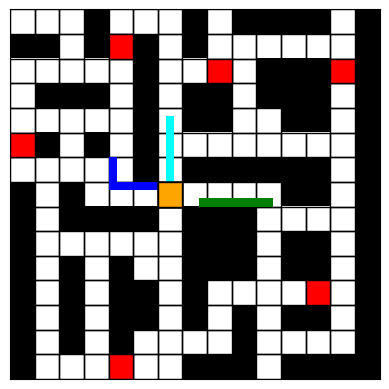

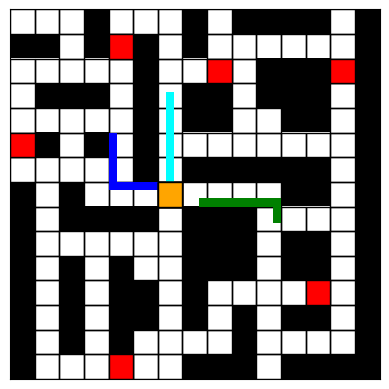

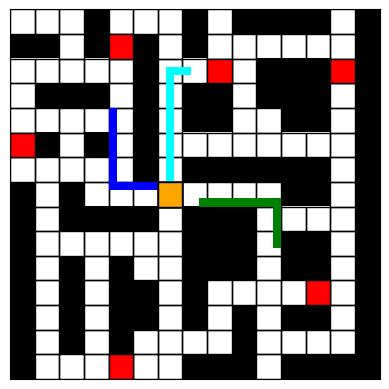

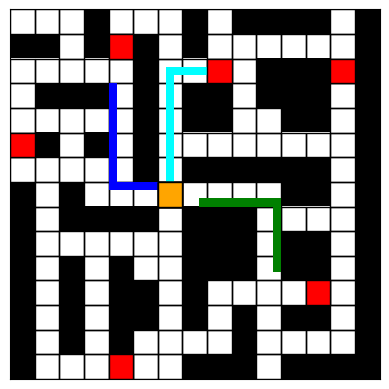

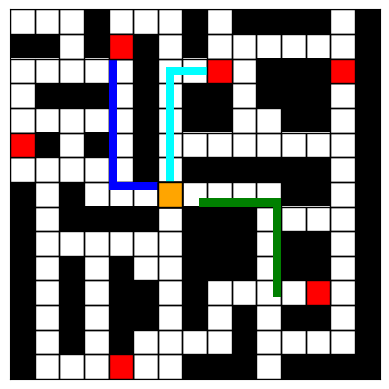

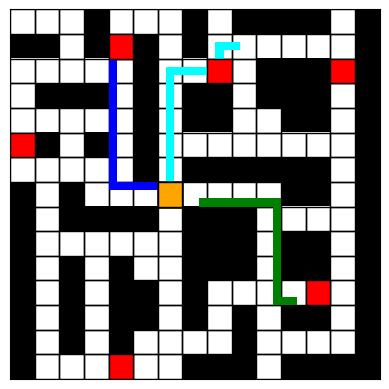

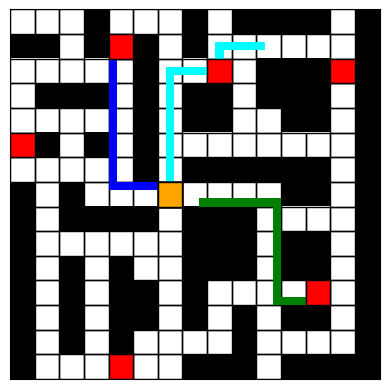

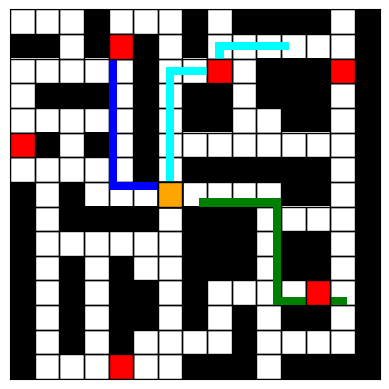

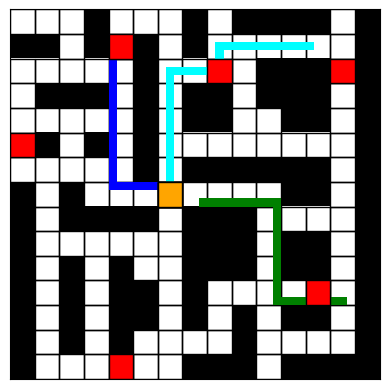

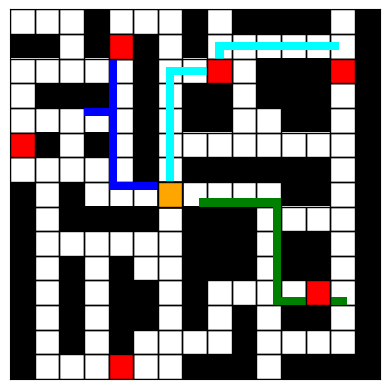

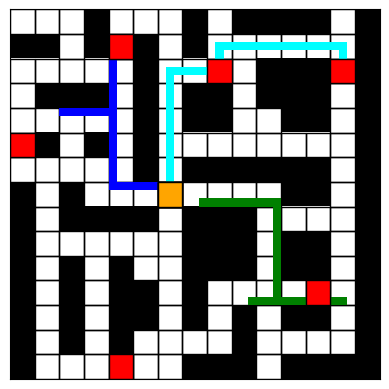

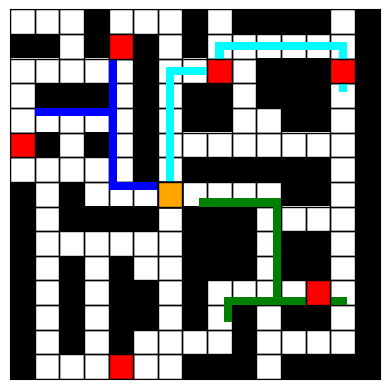

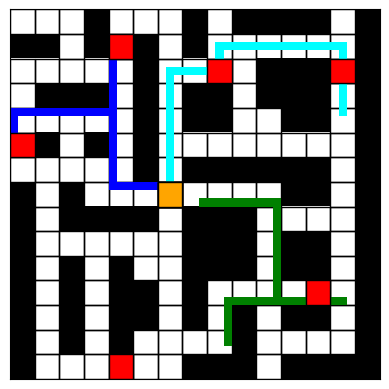

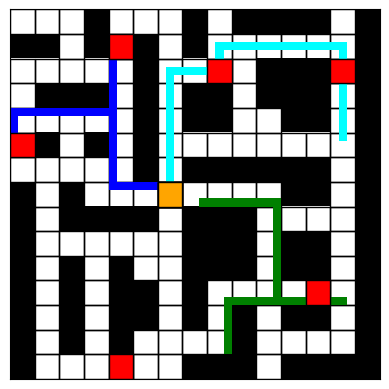

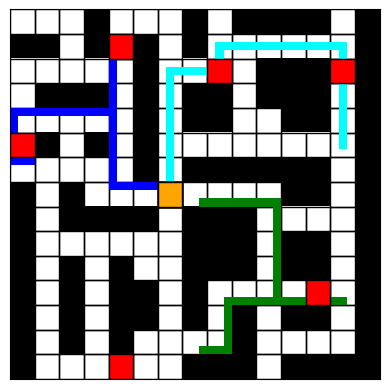

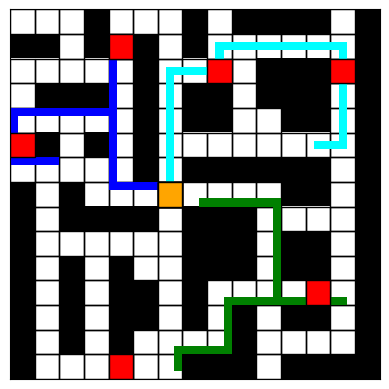

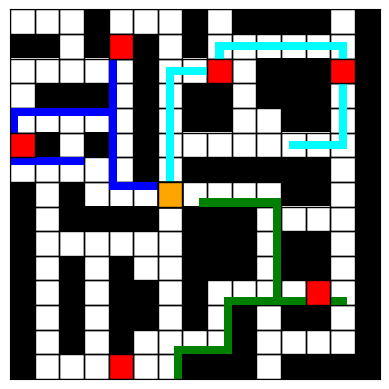

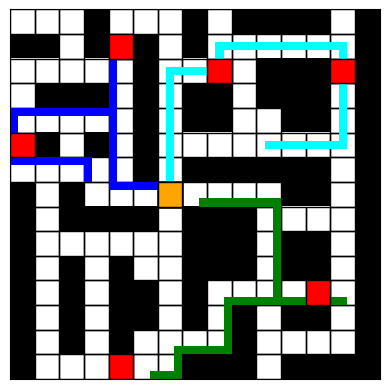

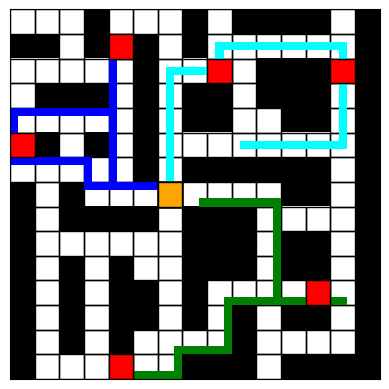

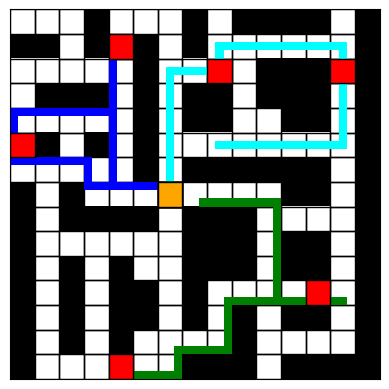

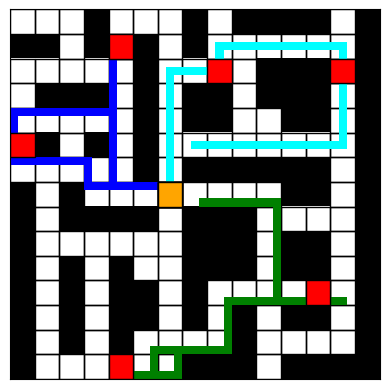

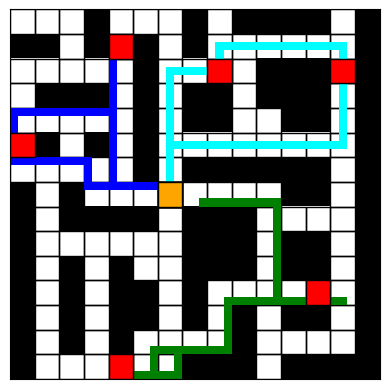

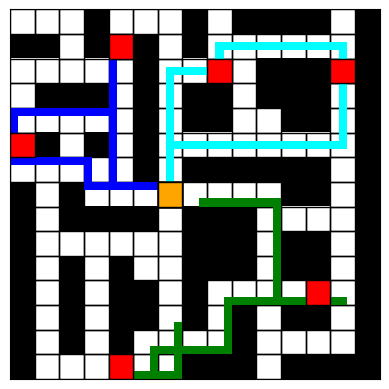

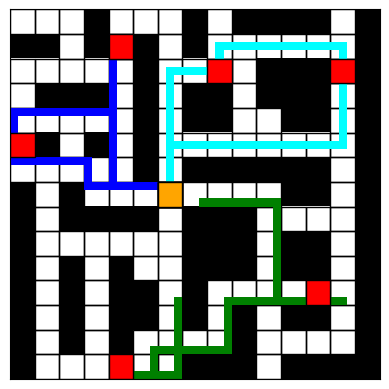

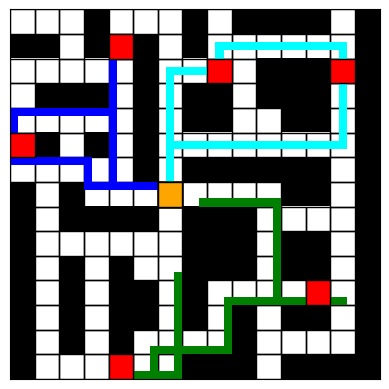

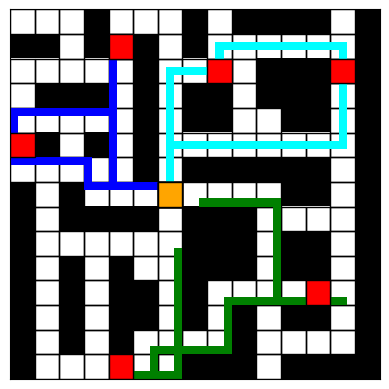

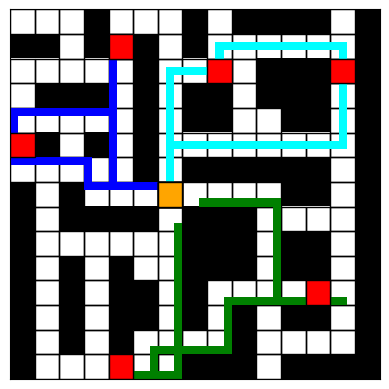

In [ ]:
opt,all_maze = multi_agent(maze3,points1,color)


### Multi Agent Rerouting - Block/Open

In [ ]:
count = 0

4
0


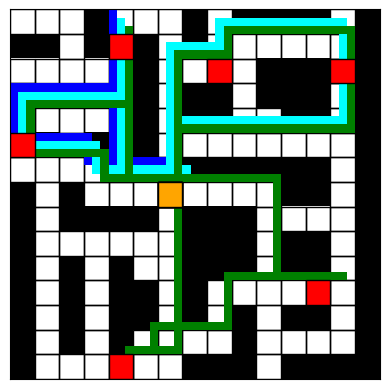

[(6, 6), (4, 1), (0, 5), (6, 7)]
[(6, 6), (8, 2), (13, 2), (6, 7)]
[(6, 6), (12, 11), (4, 14), (6, 7)]


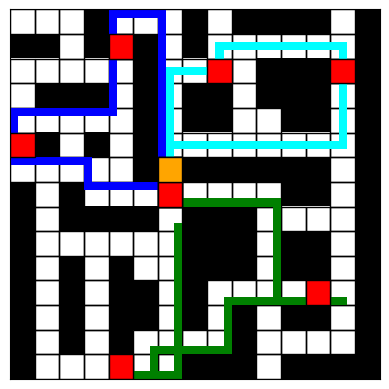

[(6, 5), (4, 1), (0, 5), (6, 7)]
[(6, 5), (8, 2), (13, 2), (6, 7)]
[(6, 7), (12, 11), (4, 14), (6, 7)]


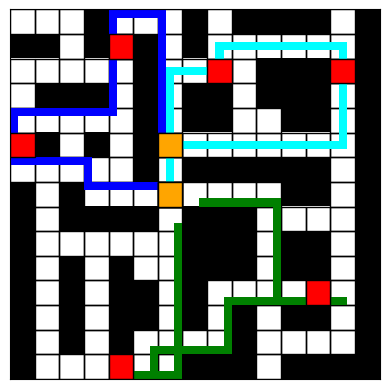

[(6, 4), (4, 1), (0, 5), (6, 7)]
[(6, 4), (8, 2), (13, 2), (6, 7)]
[(7, 7), (12, 11), (4, 14), (6, 7)]


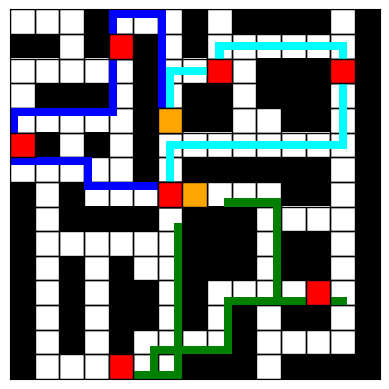

[(6, 3), (4, 1), (0, 5), (6, 7)]
[(6, 3), (8, 2), (13, 2), (6, 7)]
[(8, 7), (12, 11), (4, 14), (6, 7)]


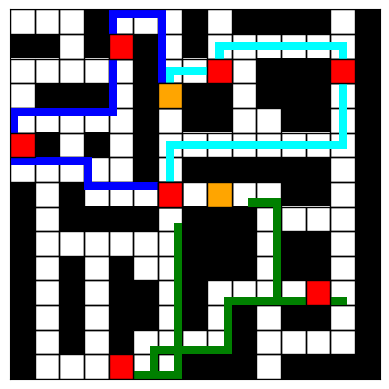

[(6, 2), (4, 1), (0, 5), (6, 7)]
[(6, 2), (8, 2), (13, 2), (6, 7)]
[(9, 7), (12, 11), (4, 14), (6, 7)]


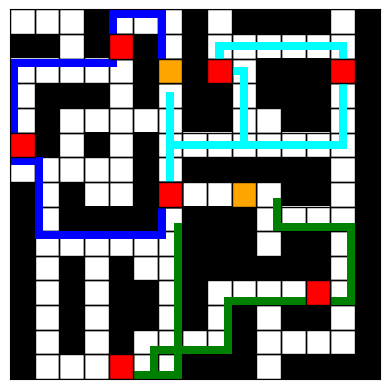

[(6, 1), (4, 1), (0, 5), (6, 7)]
[(6, 3), (8, 2), (13, 2), (6, 7)]
[(10, 7), (12, 11), (4, 14), (6, 7)]


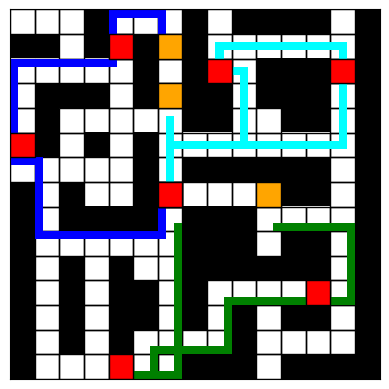

[(6, 0), (4, 1), (0, 5), (6, 7)]
[(6, 4), (8, 2), (13, 2), (6, 7)]
[(10, 8), (12, 11), (4, 14), (6, 7)]


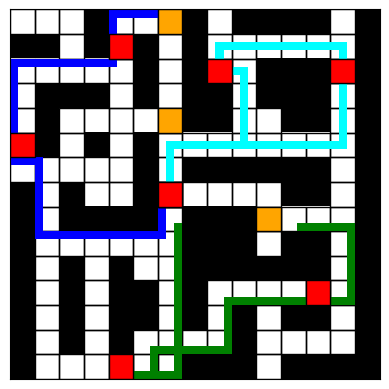

[(5, 0), (4, 1), (0, 5), (6, 7)]
[(6, 5), (8, 2), (13, 2), (6, 7)]
[(11, 8), (12, 11), (4, 14), (6, 7)]


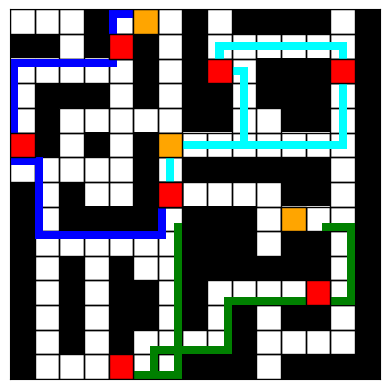

[(4, 0), (4, 1), (0, 5), (6, 7)]
[(7, 5), (8, 2), (13, 2), (6, 7)]
[(12, 8), (12, 11), (4, 14), (6, 7)]


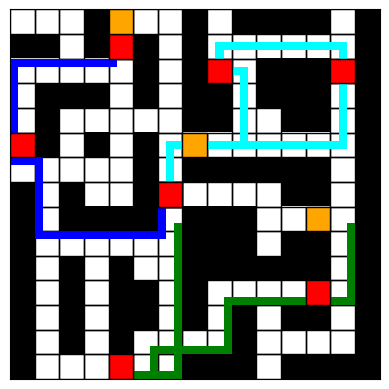

[(4, 1), (0, 5), (6, 7)]
[(8, 5), (8, 2), (13, 2), (6, 7)]
[(13, 8), (12, 11), (4, 14), (6, 7)]


IndexError: ignored

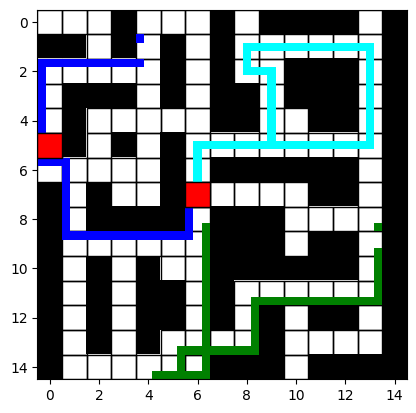

In [ ]:
count = 0
#rand1 = random.randrange(0, len(op), 1) #random step
rand1 = 4 # defined step which a wall blocks/open a path
print(rand1)
print(count)
opt0 = [[],[],[]]
while(True):

  maze_all0 = []
  #op = []
  for j in range(len(points1)):
    maze2 = maze.copy()
    maze_copy = maze.copy()
    if count > rand1:
      maze_copy = dis_maze1.copy()
      maze2 = maze_copy.copy()

    if count>0:
      if opt0[j][0] == 0:
        points1[j][0] = (points1[j][0][0],points1[j][0][1]-1)
      elif opt0[j][0] == 1:
        points1[j][0] = (points1[j][0][0],points1[j][0][1]+1)
      elif opt0[j][0] == 2:
        points1[j][0] = (points1[j][0][0]-1,points1[j][0][1])
      elif opt0[j][0] == 3:
        points1[j][0] = (points1[j][0][0]+1,points1[j][0][1])
      opt = []
      if points1[j][0] == points1[j][1]:
        points1[j].remove(points1[j][0])
      print(points1[j])

    for i in range(len(points1[j])-1):
      maze1,optimal_path = train(maze2,points1[j][i],points1[j][i+1])
      opt.append(optimal_path)

      #print(optimal_path)
      #print(maze)
    op = []
    for nums in opt:
      for val in nums:
        op.append(val)
    maze_all0.append(maze1)
    opt0[j] = op

  # show_maze_out(maze1,points[j])

  count = count+1
  #  show_maze_out1(maze,np.array(all_maze),points,color,3,result_list)
  show_maze_out1(maze_copy,np.array(maze_all0),points1,color,3,opt0)

In [ ]:
points1

[[(7, 7), (4, 1), (0, 5), (6, 7)],
 [(5, 7), (8, 2), (13, 2), (6, 7)],
 [(7, 7), (12, 11), (4, 14), (6, 7)]]